In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Load Dataset

In [475]:
# load the datasets
loan=pd.read_csv("/content/Loan.csv")

In [476]:
loan

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0          2018-01-01   45         39948          617         Employed   
1          2018-01-02   38         39709          628         Employed   
2          2018-01-03   47         40724          570         Employed   
3          2018-01-04   58         69084          545         Employed   
4          2018-01-05   37        103264          594         Employed   
...               ...  ...           ...          ...              ...   
19995      2072-09-29   44         30180          587         Employed   
19996      2072-09-30   56         49246          567         Employed   
19997      2072-10-01   44         48958          645         Employed   
19998      2072-10-02   60         41025          560         Employed   
19999      2072-10-03   20         53227          574         Employed   

      EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0             Master          22       13152            48       Married  ...   
1          Associate          15       26045            48        Single  ...   
2           Bachelor          26       17627            36       Married  ...   
3        High School          34       37898            96        Single  ...   
4          Associate          17        9184            36       Married  ...   
...              ...         ...         ...           ...           ...  ...   
19995    High School          19       24521            36       Married  ...   
19996      Associate          33       25818            36       Married  ...   
19997       Bachelor          20       37033            72       Married  ...   
19998    High School          36       14760            72       Married  ...   
19999      Associate           0       32055            48       Married  ...   

       MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0        3329.000000                   0.724972         11    126928   
1        3309.083333                   0.935132          3     43609   
2        3393.666667                   0.872241          6      5205   
3        5757.000000                   0.896155          5     99452   
4        8605.333333                   0.941369          5    227019   
...              ...                        ...        ...       ...   
19995    2515.000000                   0.826217          1     55327   
19996    4103.833333                   0.816618          3     64002   
19997    4079.833333                   0.887216          3    103663   
19998    3418.750000                   0.843787          5     10600   
19999    4435.583333                   0.853801          5     41372   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0              0.199652      0.227590          419.805992   
1              0.207045      0.201077          794.054238   
2              0.217627      0.212548          666.406688   
3              0.300398      0.300911         1047.506980   
4              0.197184      0.175990          330.179140   
...                 ...           ...                 ...   
19995          0.216021      0.195574          905.767712   
19996          0.227318      0.199168          958.395633   
19997          0.229533      0.226766          945.427454   
19998          0.249760      0.264873          411.168284   
19999          0.240055      0.242693         1049.830407   

       TotalDebtToIncomeRatio LoanApproved  RiskScore  
0                    0.181077            0       49.0  
1                    0.389852            0       52.0  
2                    0.462157            0       52.0  
3                    0.313098            0       54.0  
4                    0.070210            1       36.0  
...                       ...          ...        ...  
19995                0.627741            0       55.0  
19996                0.334418            0       54.0  
19997                0.357227            0

In [477]:
loan.shape

(20000, 36)

In [478]:
loan.columns # return colums names

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [479]:
loan.head() # return the fist 5 rows

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [480]:
loan.info() # infomation about the coloums non-missing values and coloums data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [481]:
loan.describe() # retuen the calculation of some statistical data like mean and std

Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.000000            0.000000            50.000000   
25%       36.000000            0.000000           286.000000   
50%       48.000000            1.000000           402.000000   
75%       72.000000            2.000000           564.000000   
max      120.000000            5.000000          2919.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  ...  MonthlyIncome  \
count               20000.000000             20000.000000  ...   20000.000000   
mean                    0.286381                 3.023350  ...    4891.715521   
std                     0.159793                 1.736161  ...    3296.771598   
min                     0.000974                 0.000000  ...    1250.000000   
25%                     0.160794                 2.000000  ...    2629.583333   
50%                     0.266673                 3.000000  ...    4034.750000   
75%                     0.390634                 4.000000  ...    6163.000000   
max                     0.917380                13.000000  ...   25000.000000   

       UtilityBillsPaymentHistory     JobTenure      NetWorth  \
count                20000.000000  20000.000000  2.000000e+04   
mean                     0.799918      5.002650  7.229432e+04   
std                      0.120665      2.236804  1.179200e+05   
min                      0.259203      0.000000  1.000000e+03   
25%                      0.727379      3.000000  8.734750e+03   
50%                      0.820962      5.000000  3.285550e+04   
75%                      0.892333      6.000000  8.882550e+04   
max                      0.999433     16.000000  2.603208e+06   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count      20000.000000  20000.000000        20000.000000   
mean           0.239124      0.239110          911.607052   
std            0.035509      0.042205          674.583473   
min            0.130101      0.113310           97.030193   
25%            0.213889      0.209142          493.763700   
50%            0.236157      0.235390          728.511452   
75%            0.261533      0.265532         1112.770759   
max            0.405029      0.446787        10892.629520   

       TotalDebtToIncomeRatio  LoanApproved     RiskScore  
count            20000.000000  20000.000000  20000.000000  
mean                 0.402182      0.239000     50.766780  
std                  0.338924      0.426483      7.778262  
min                  0.016043      0.000000     28.800000  
25%                  0.179693      0.000000     46.000000  
50%                  0.302711      0.000000     52.000000  
75%                  0.509214      0.000000     56.000000  
max                  4.647657      1.000000     84.000000  

[8 rows x 30 columns]

Handel missing values and outliers

In [482]:
loan.duplicated().sum() # return the number of duplicated rows

0

In [483]:
loan.isnull().sum() # returns numbers of null values at each coloum

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
dtype: int64

In [484]:
# remove rows with missing valuse in loan dataset
loan = loan.dropna()

In [485]:
numerical_columns = loan.select_dtypes(include=np.number).columns
numerical_columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

In [486]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [487]:
float64_cols = loan.select_dtypes(include=['float64']).columns
float64_cols

Index(['CreditCardUtilizationRate', 'DebtToIncomeRatio', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore'],
      dtype='object')

In [488]:
# numerical_columns = [
#     'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
#        'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
#        'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
#        'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
#        'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
#        'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
#        'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
#        'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
#        'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
#        'RiskScore'
# ]

## it contains only the nummeric columns, excluding encoded categorical columns

In [489]:
numerical_columns = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio',
       'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'RiskScore']

Boxplot to handle outliers

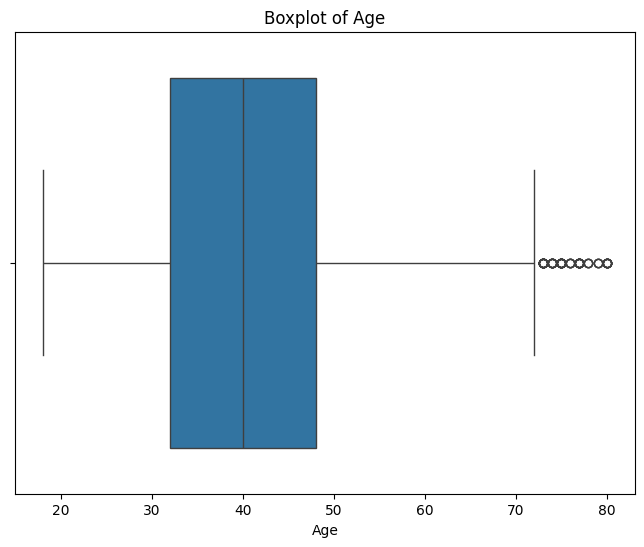

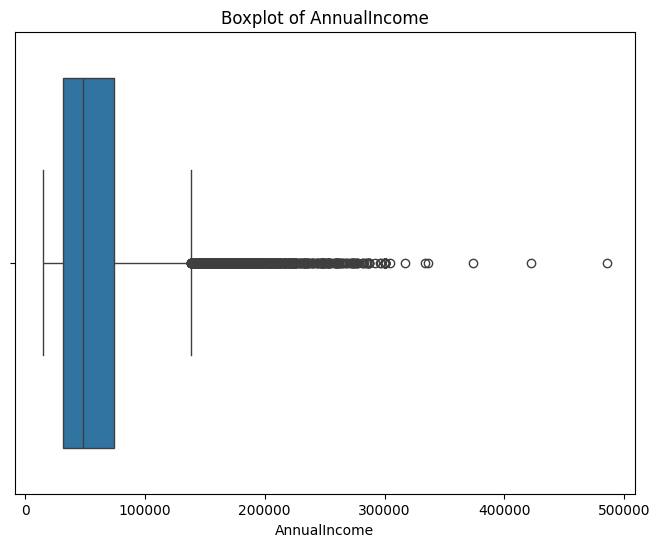

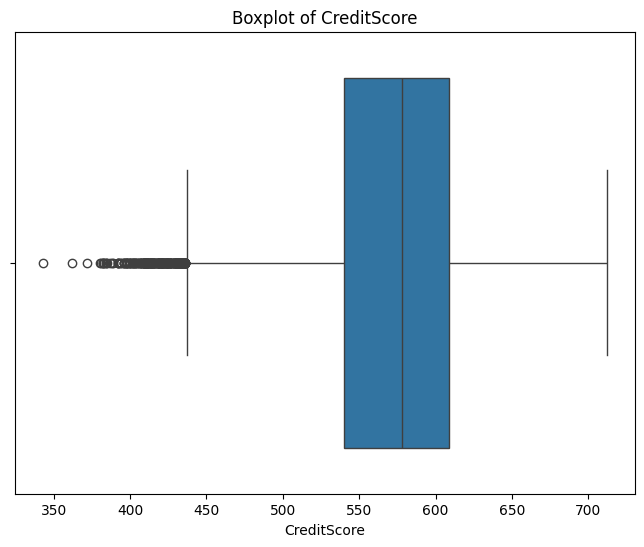

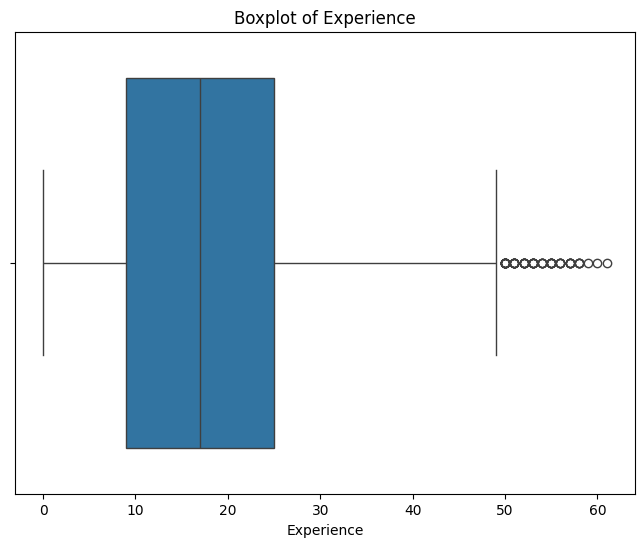

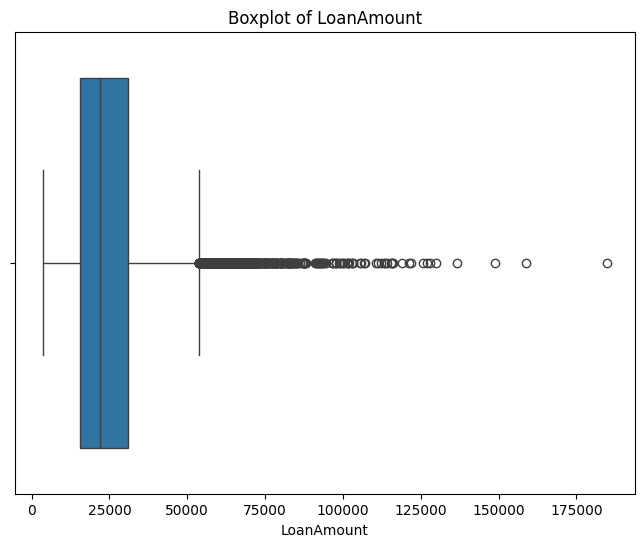

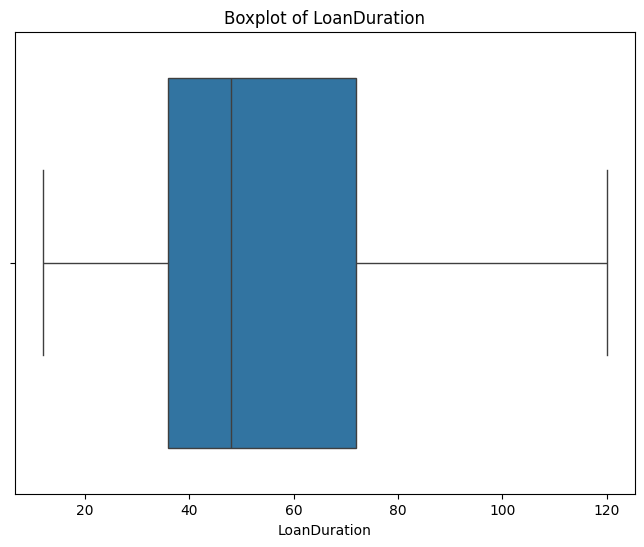

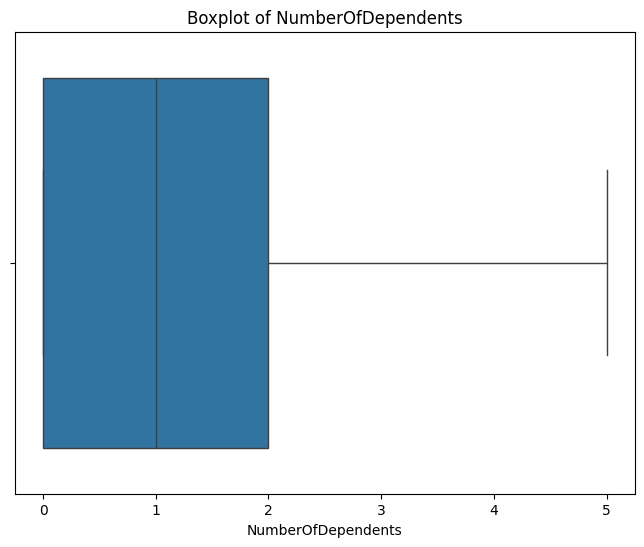

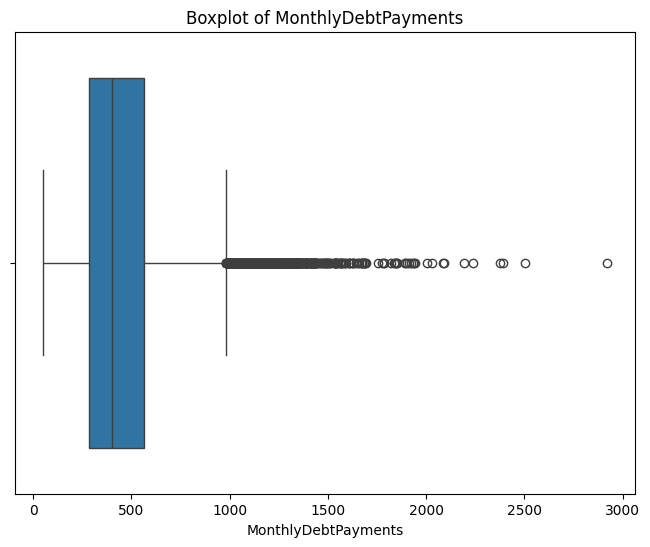

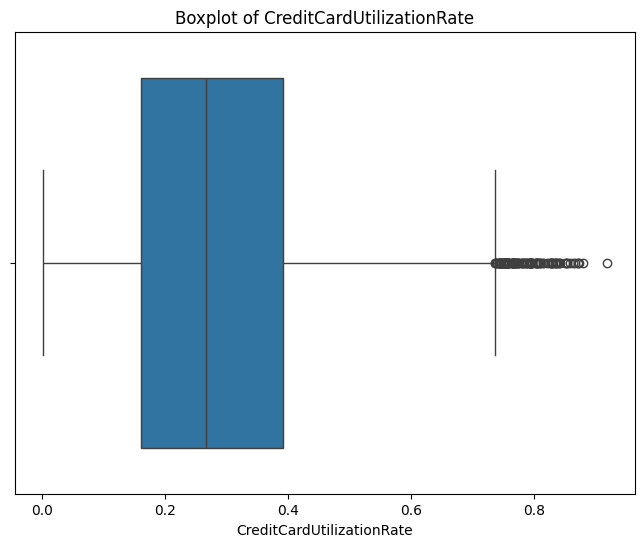

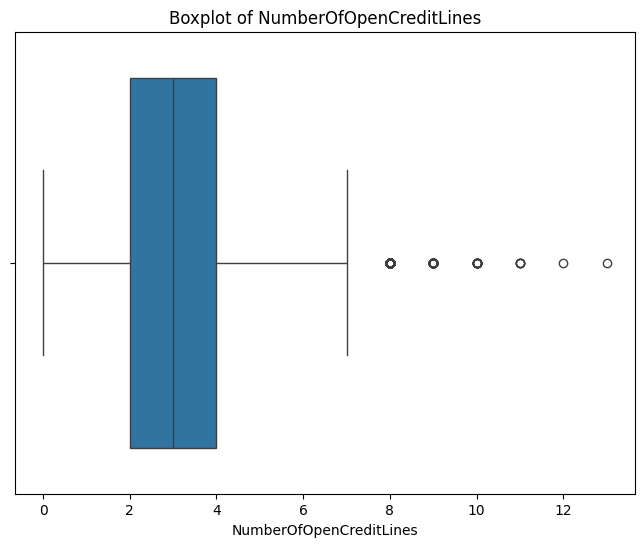

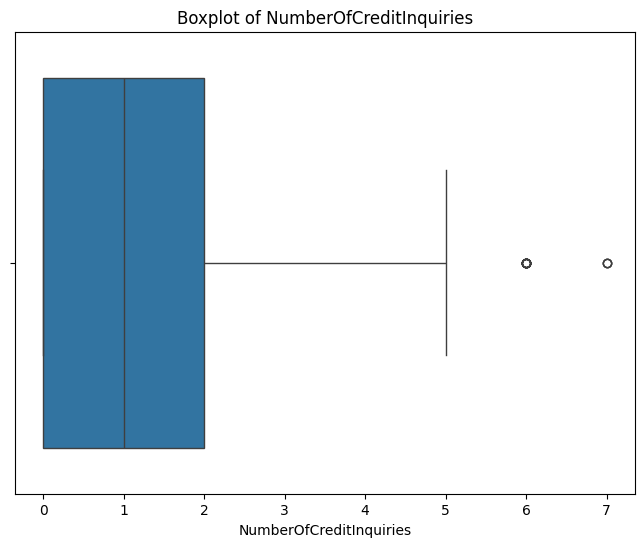

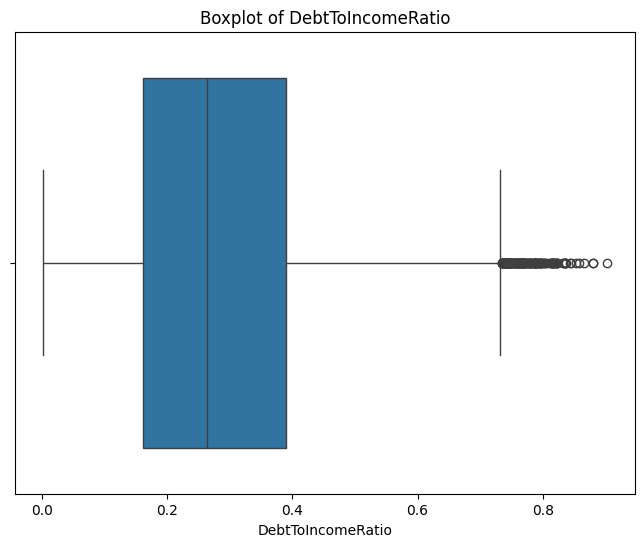

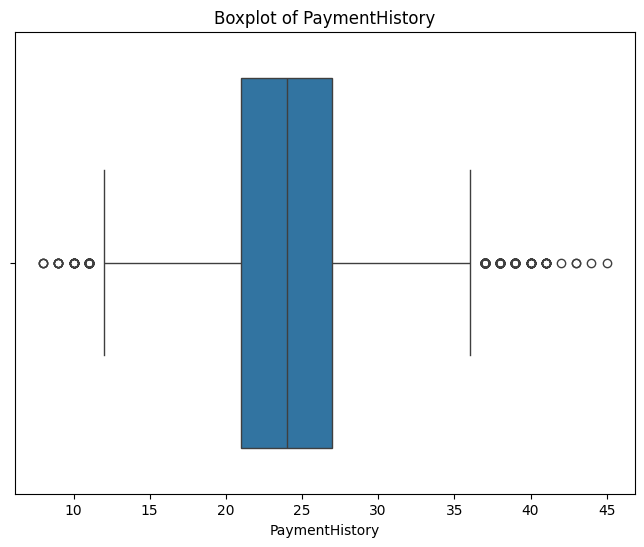

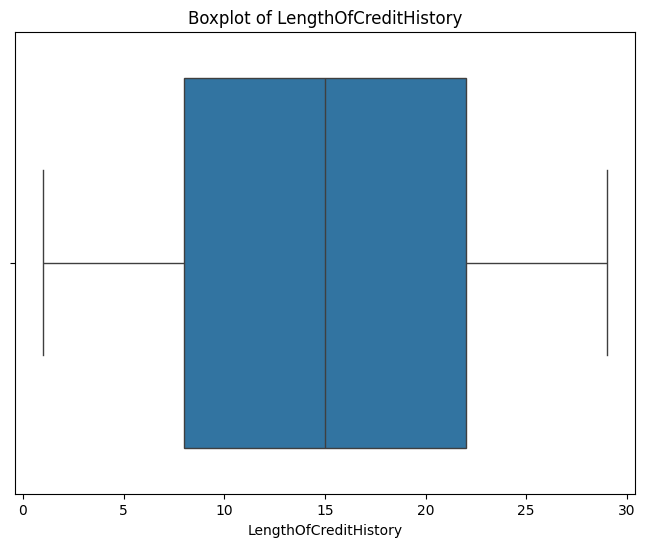

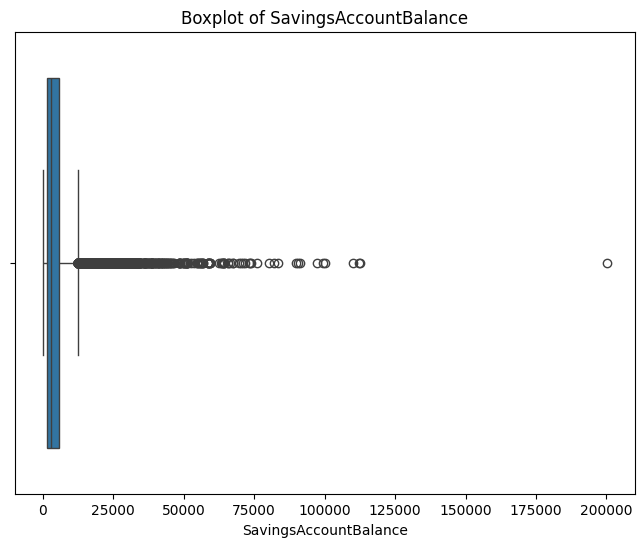

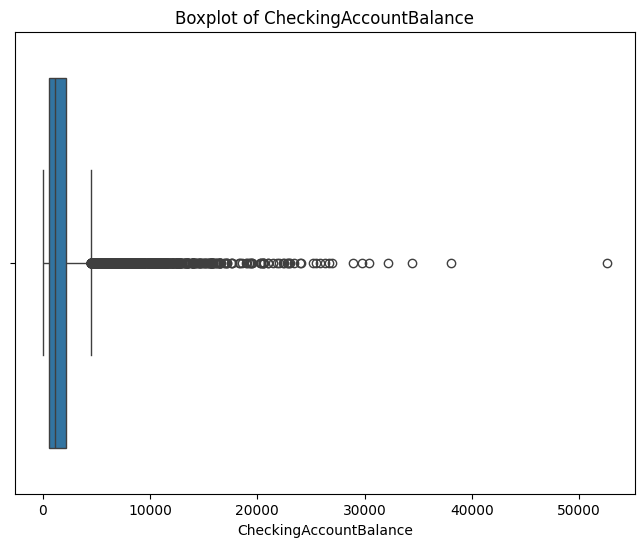

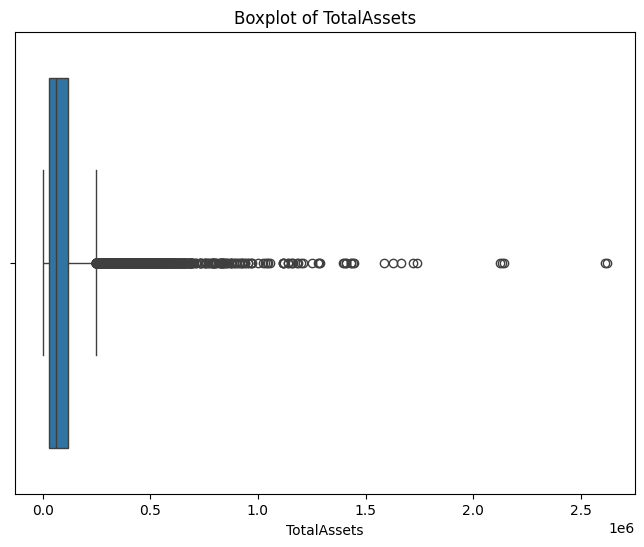

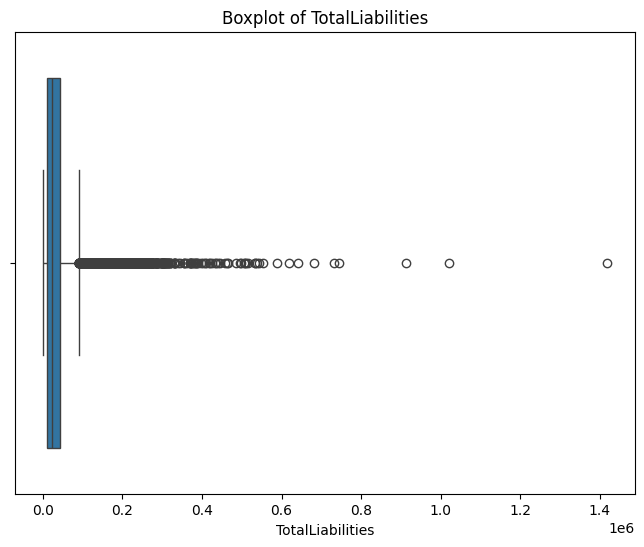

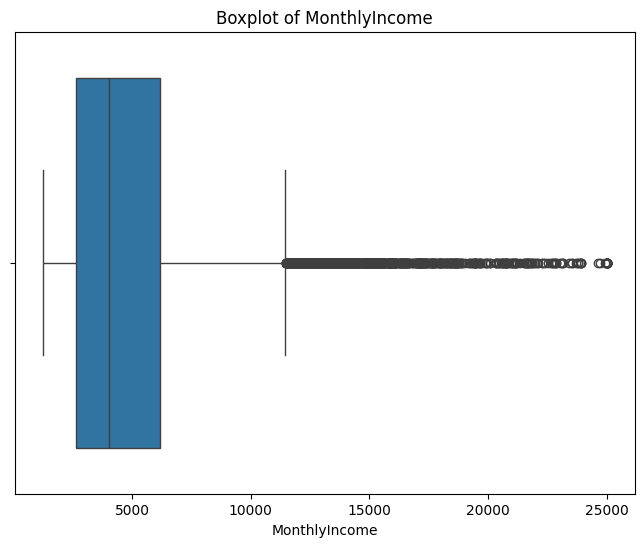

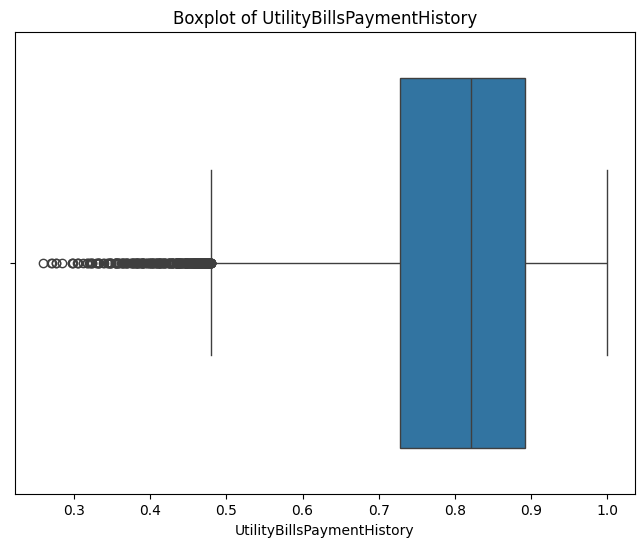

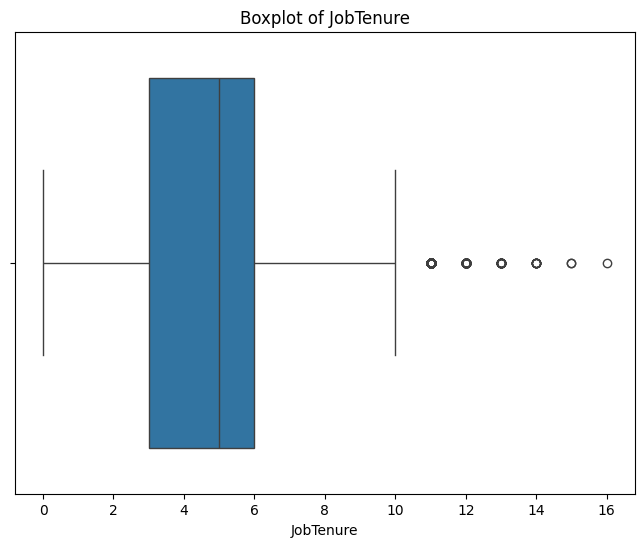

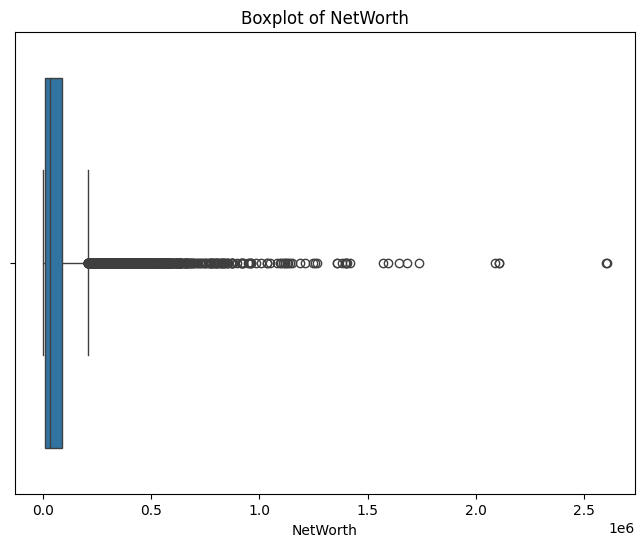

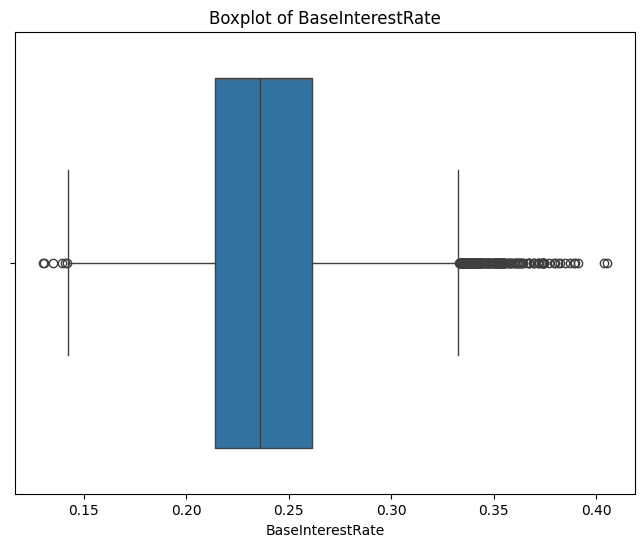

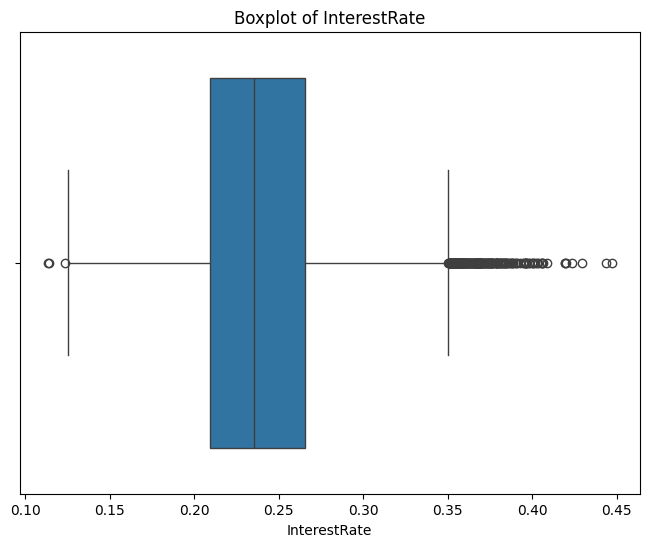

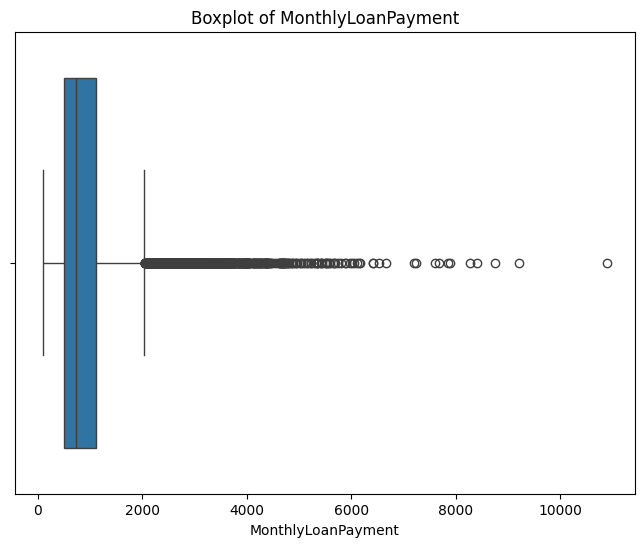

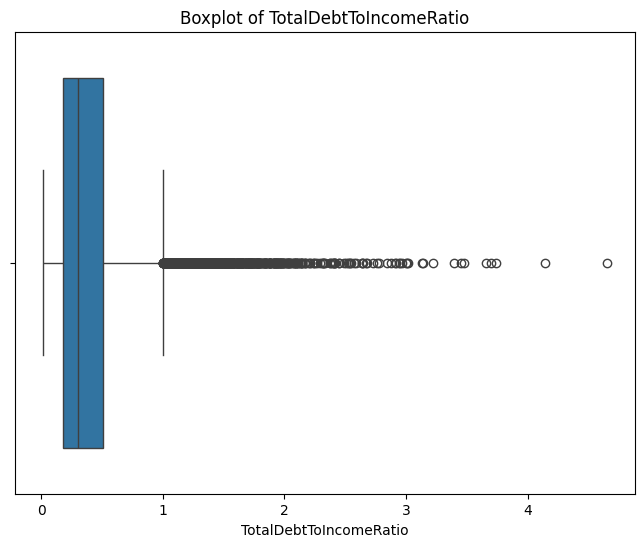

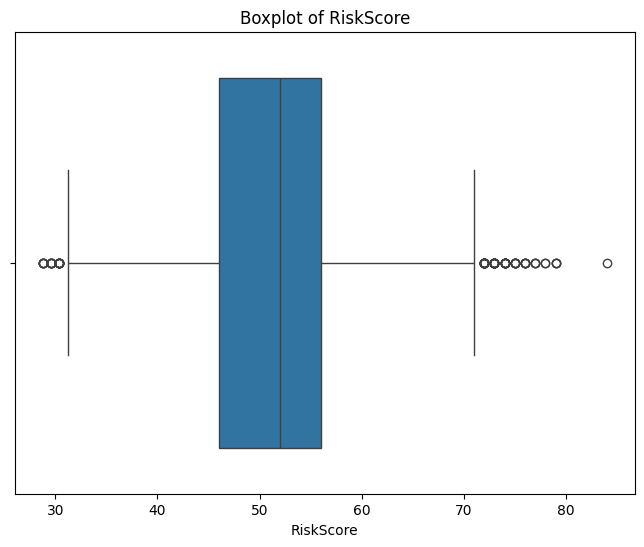

In [490]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loan[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [491]:
medians = []
for col in numerical_columns:
    median = loan[col].median()
    medians.append(median)
medians

[40.0,
 48566.0,
 578.0,
 17.0,
 21914.5,
 48.0,
 1.0,
 402.0,
 0.2666726020550306,
 3.0,
 1.0,
 0.2644540175411533,
 24.0,
 15.0,
 2986.0,
 1116.0,
 60699.0,
 22203.0,
 4034.75,
 0.8209617609728834,
 5.0,
 32855.5,
 0.236157,
 0.2353899899371778,
 728.5114515123852,
 0.30271146497209966,
 52.0]

In [492]:
upper_bounds = []
lower_bounds = []
Q1s = []
Q3s = []
IQRs = []
for col in numerical_columns:
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    IQR = Q3-Q1
    Q1s.append(Q1)
    Q3s.append(Q3)
    IQRs.append(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    lower_bounds.append(lower)
    upper_bounds.append(upper)
lower_bounds

[8.0,
 -32389.0,
 436.5,
 -15.0,
 -7315.0,
 -18.0,
 -3.0,
 -131.0,
 -0.18396692905046616,
 -1.0,
 -3.0,
 -0.18290369410042145,
 12.0,
 -13.0,
 -4955.5,
 -1811.5,
 -98157.25,
 -36727.875,
 -2670.541666666667,
 0.47994851624802926,
 -1.5,
 -111401.375,
 0.14242325,
 0.12455852807396543,
 -434.7468879579118,
 -0.3145876480645029,
 31.0]

In [493]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [494]:
loan.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [495]:

for i in range(len(numerical_columns)):
    col = numerical_columns[i]
    median = medians[i]
    lower_bound = lower_bounds[i]
    upper_bound = upper_bounds[i]
    loan.loc[(loan[col] < lower_bound) | (loan[col] > upper_bound), col] = median

<ipython-input-495-68070ecdb840>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21914.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  loan.loc[(loan[col] < lower_bound) | (loan[col] > upper_bound), col] = median
<ipython-input-495-68070ecdb840>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32855.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  loan.loc[(loan[col] < lower_bound) | (loan[col] > upper_bound), col] = median


In [496]:
loan.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22     13152.0            48       Married  ...   
1      Associate          15     26045.0            48        Single  ...   
2       Bachelor          26     17627.0            36       Married  ...   
3    High School          34     37898.0            96        Single  ...   
4      Associate          17      9184.0            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972          5  126928.0   
1    3309.083333                   0.935132          3   43609.0   
2    3393.666667                   0.872241          6    5205.0   
3    5757.000000                   0.896155          5   99452.0   
4    8605.333333                   0.941369          5   32855.5   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

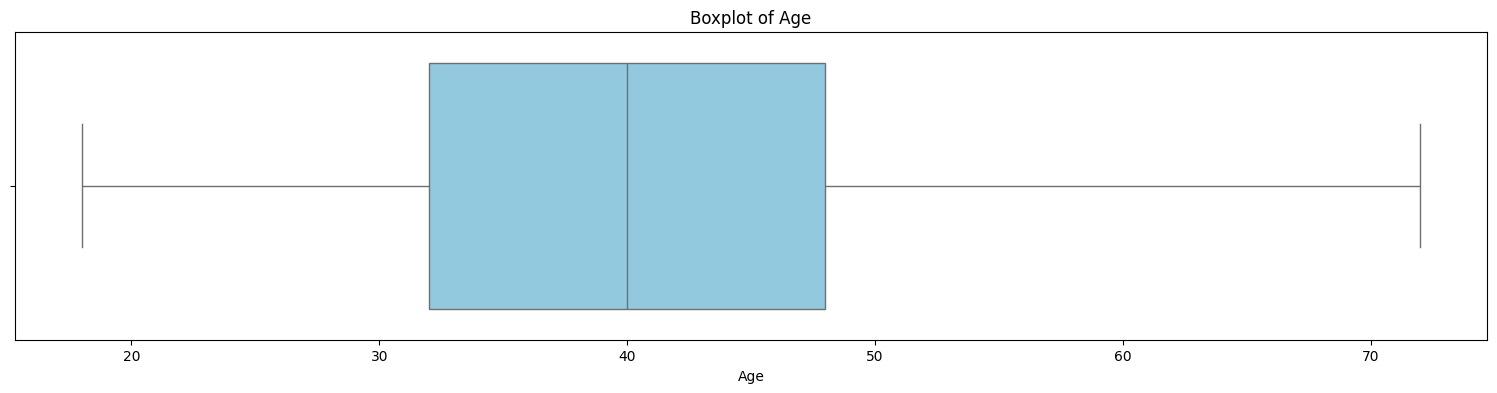

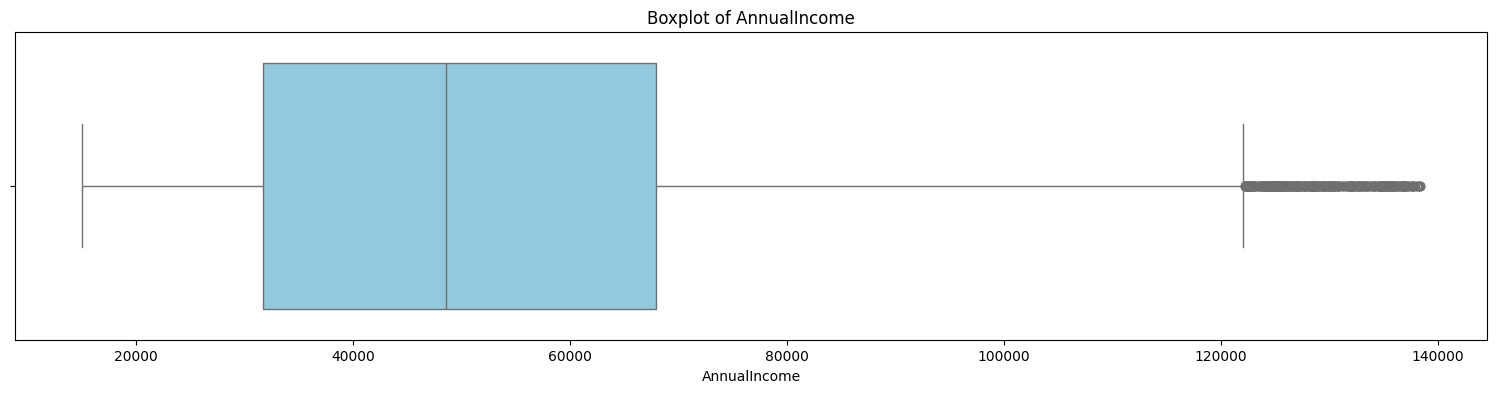

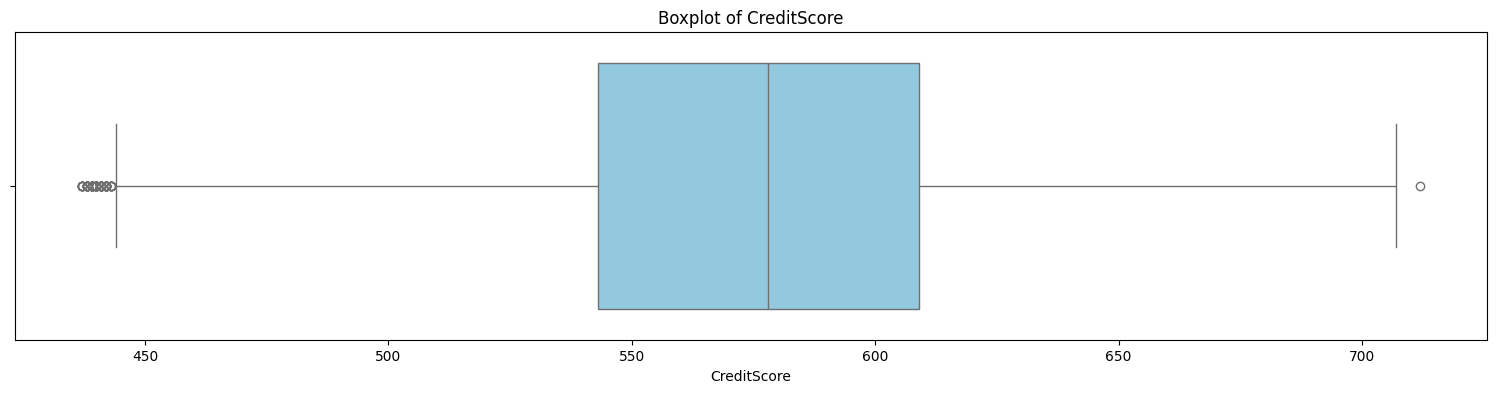

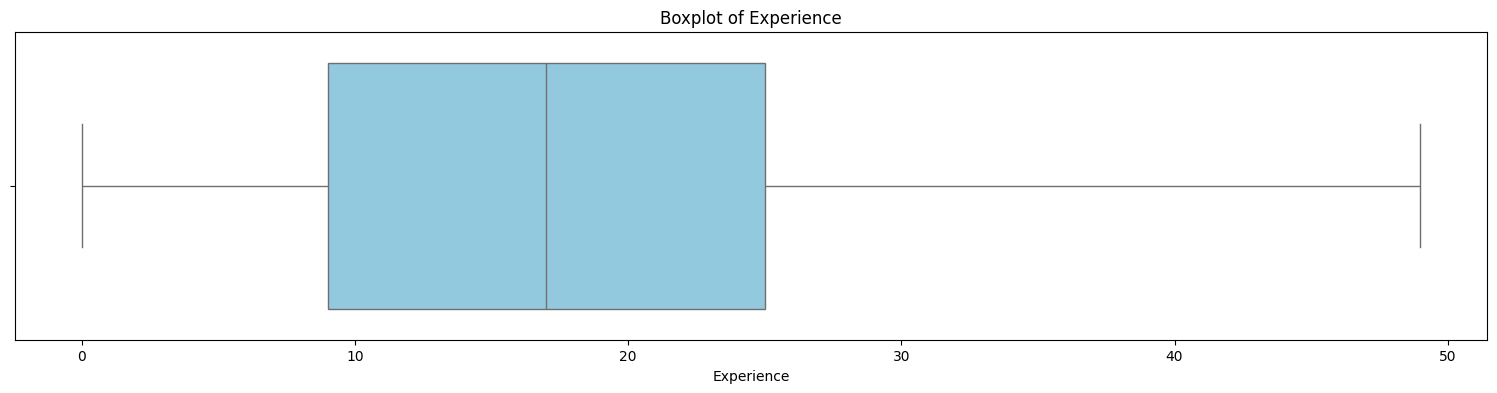

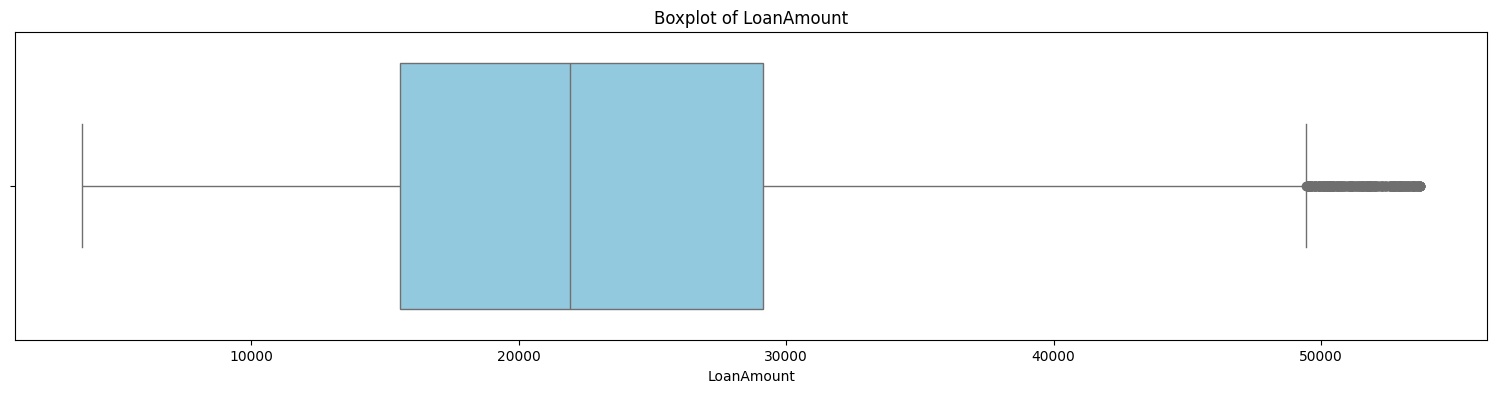

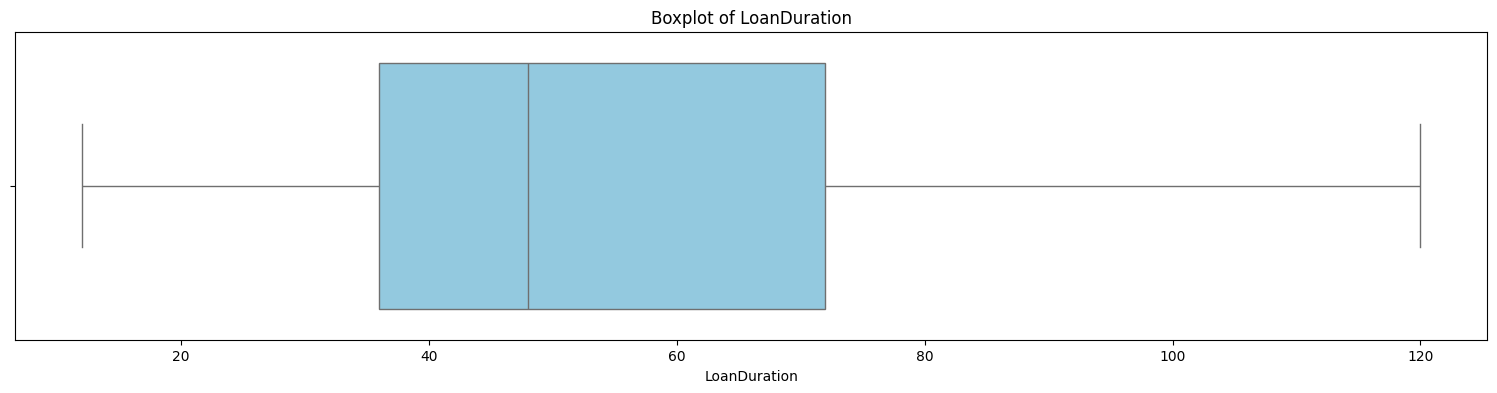

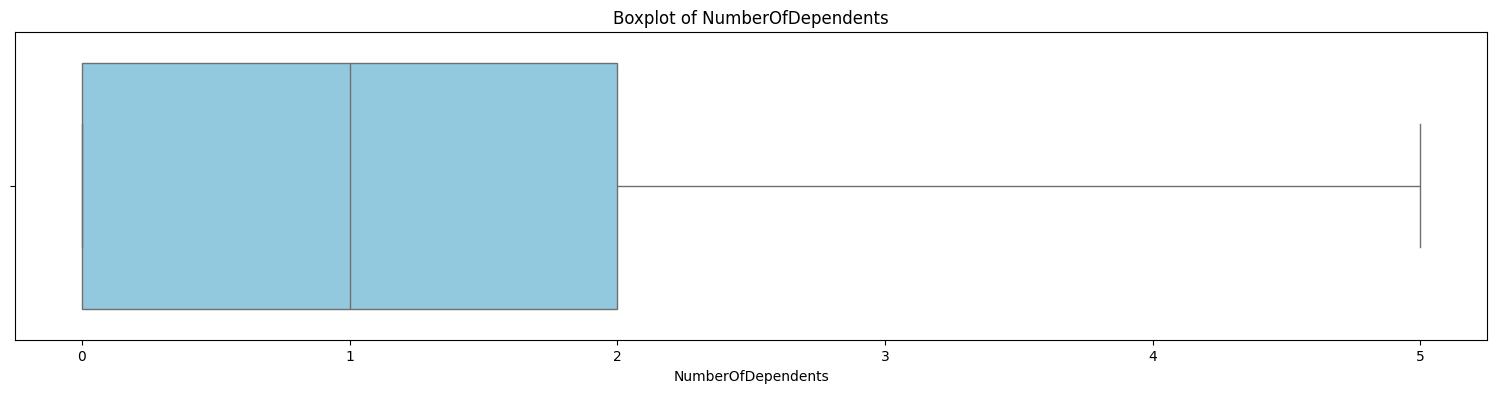

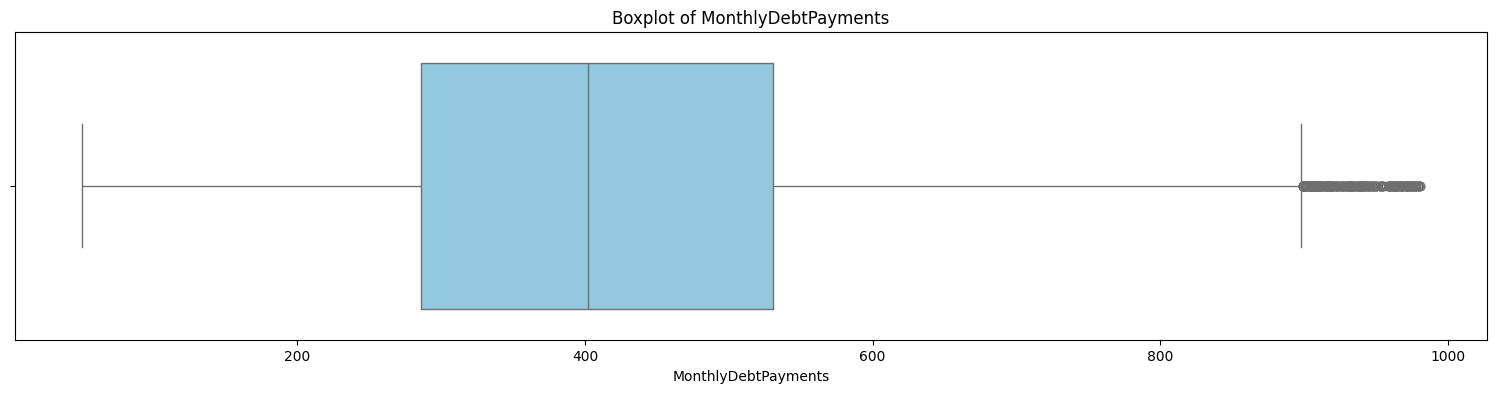

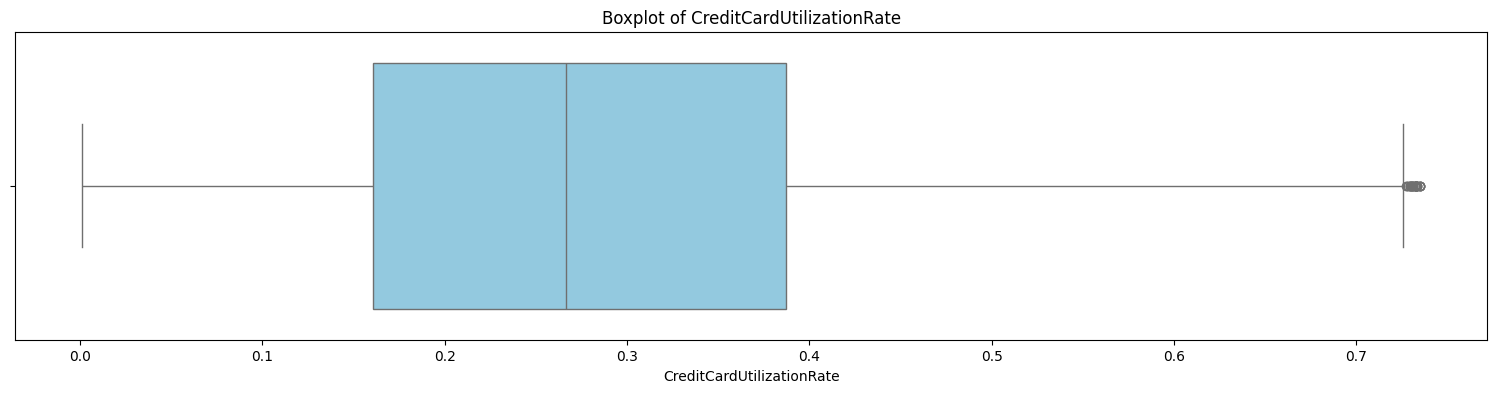

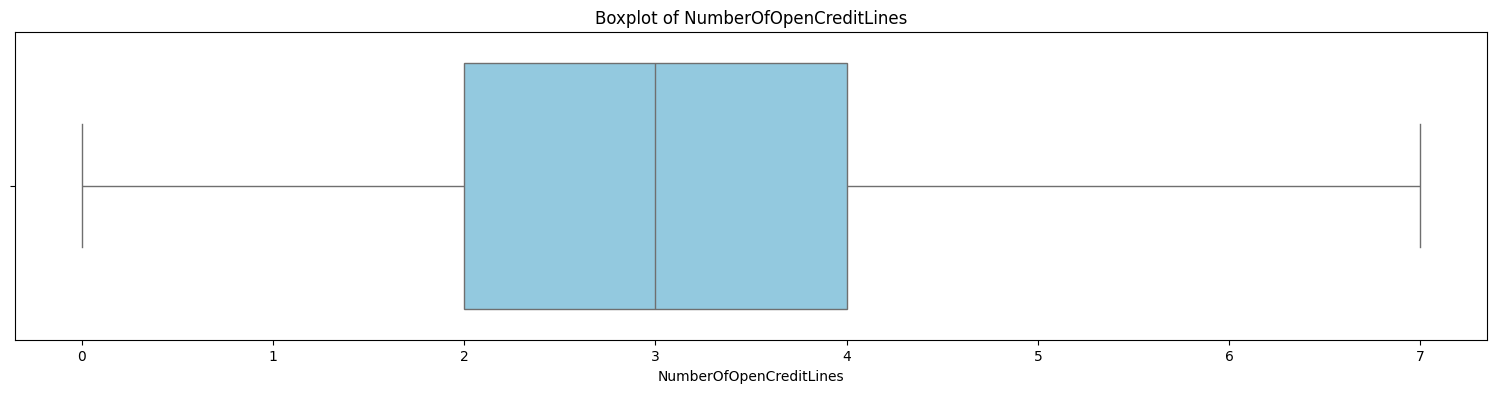

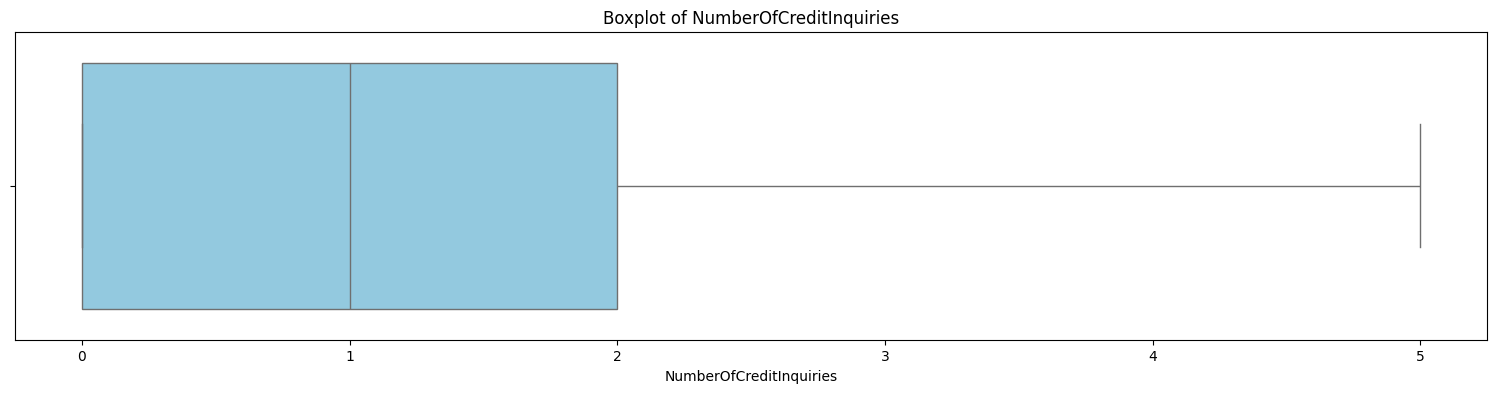

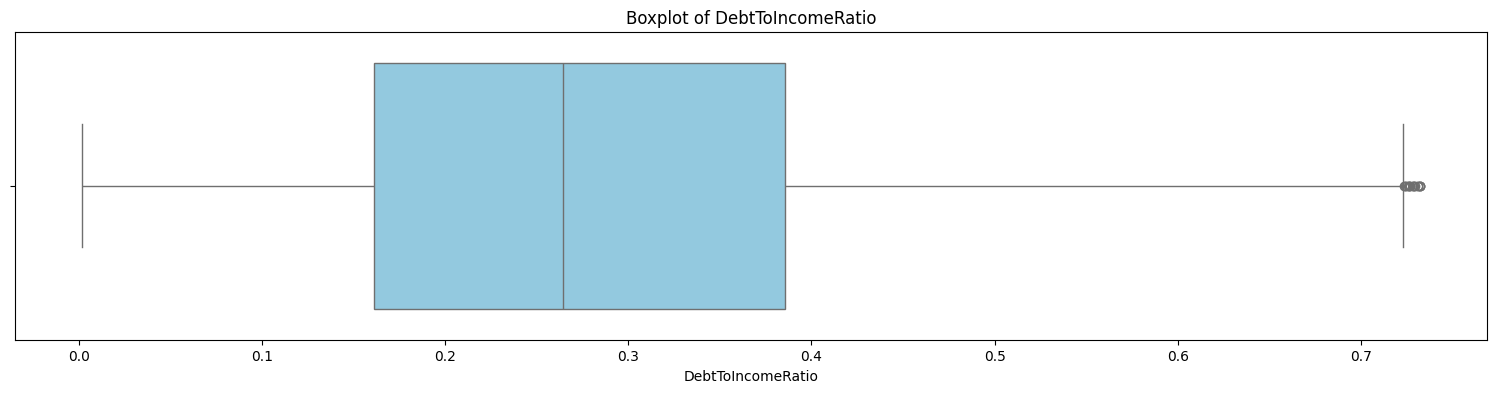

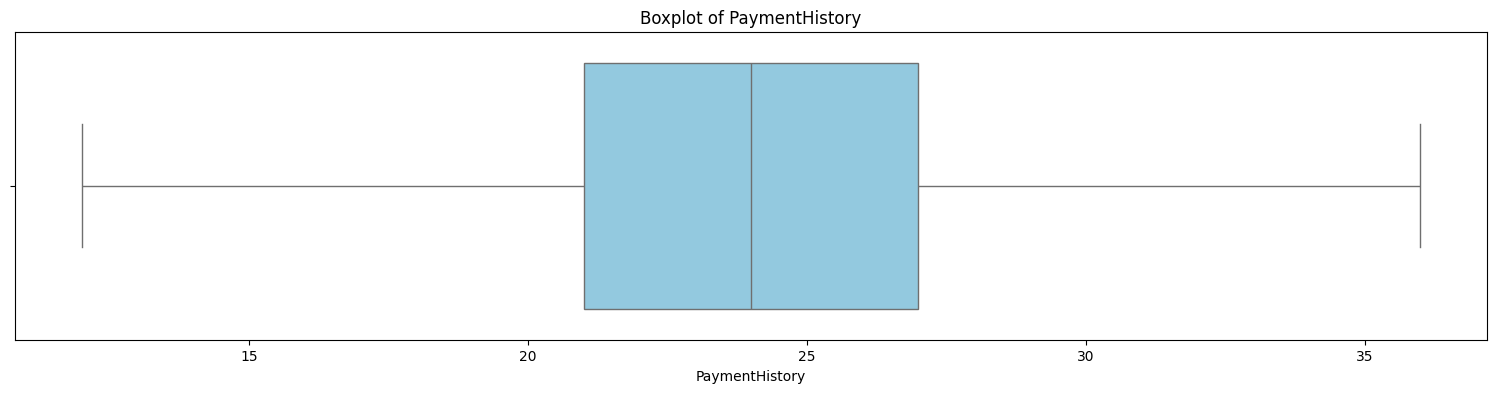

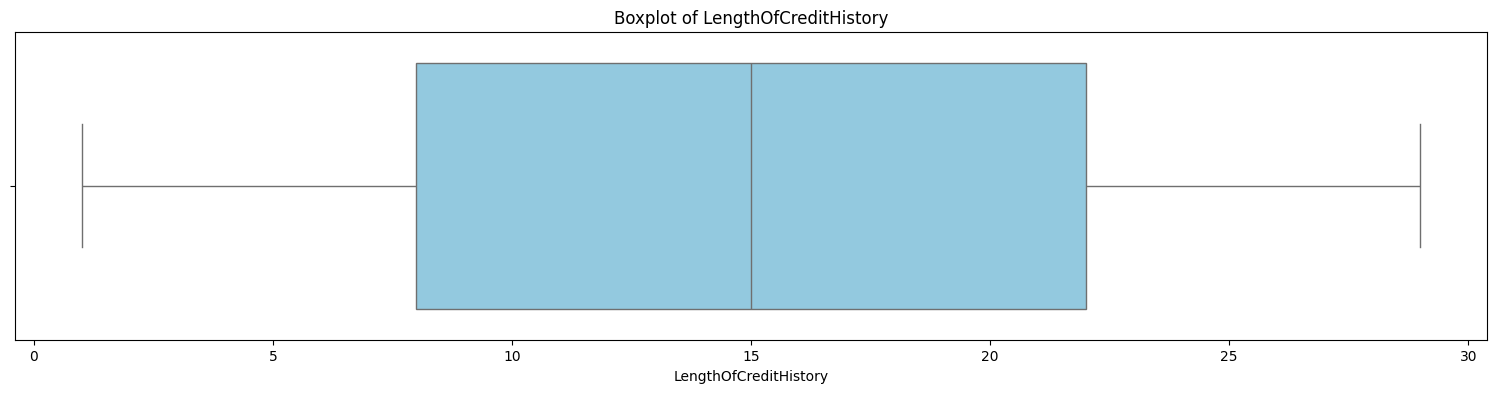

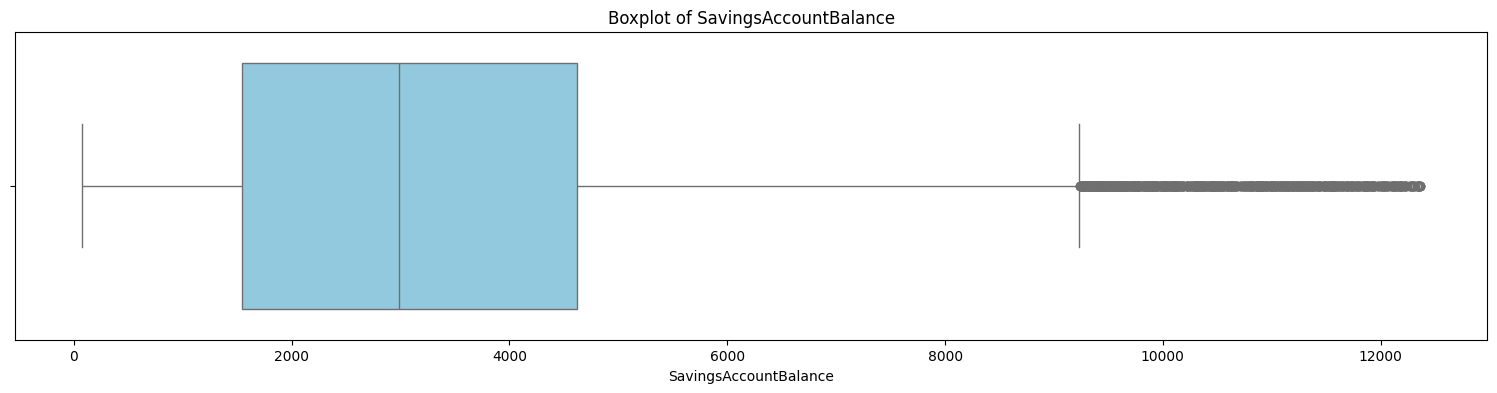

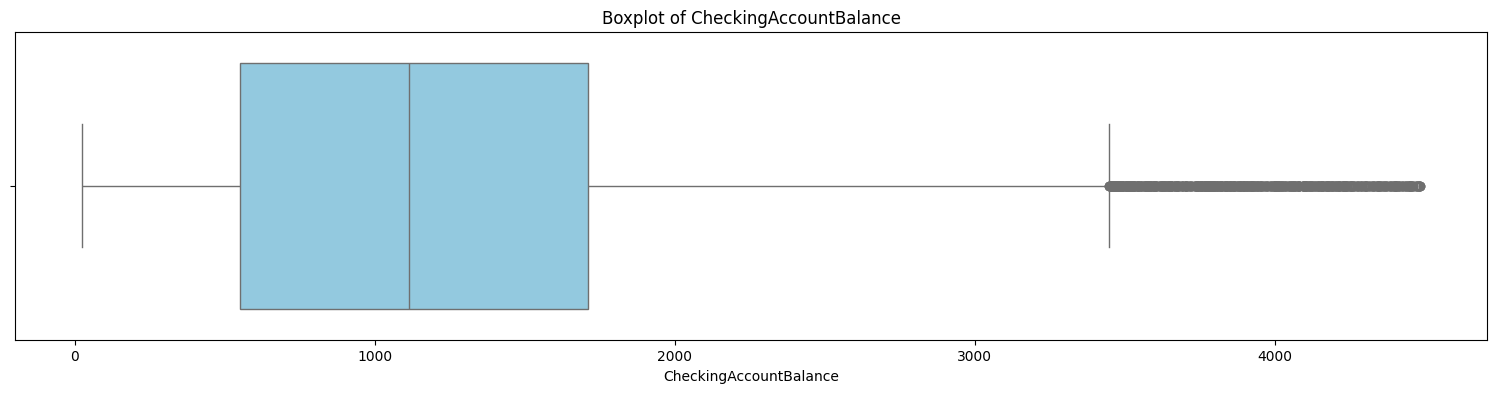

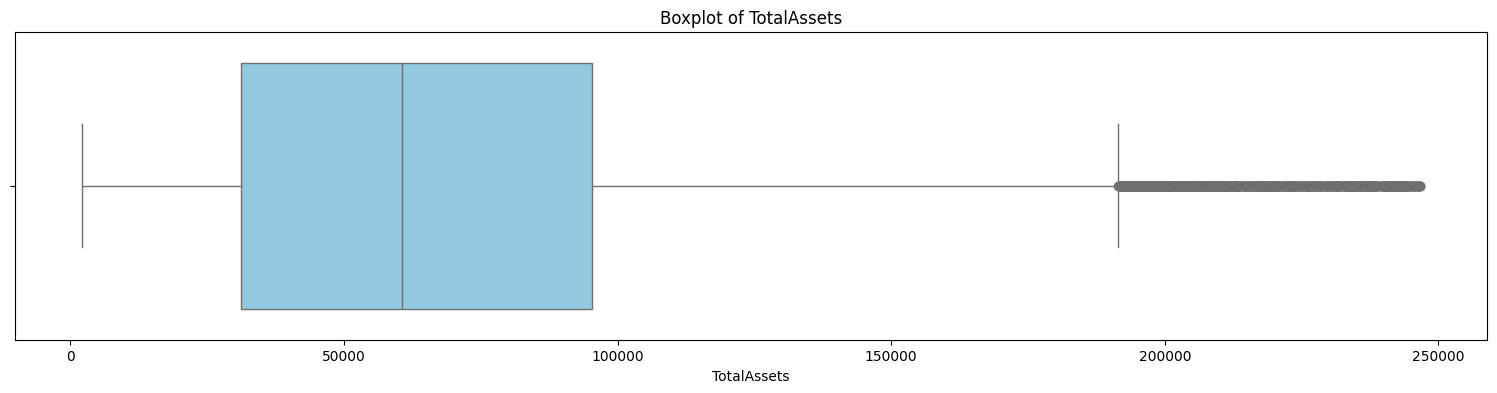

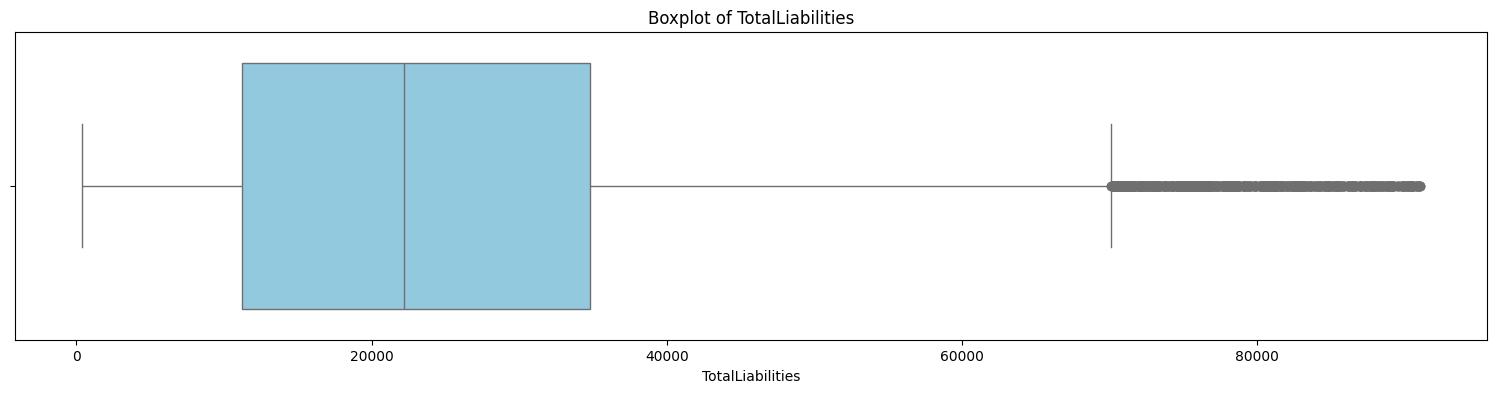

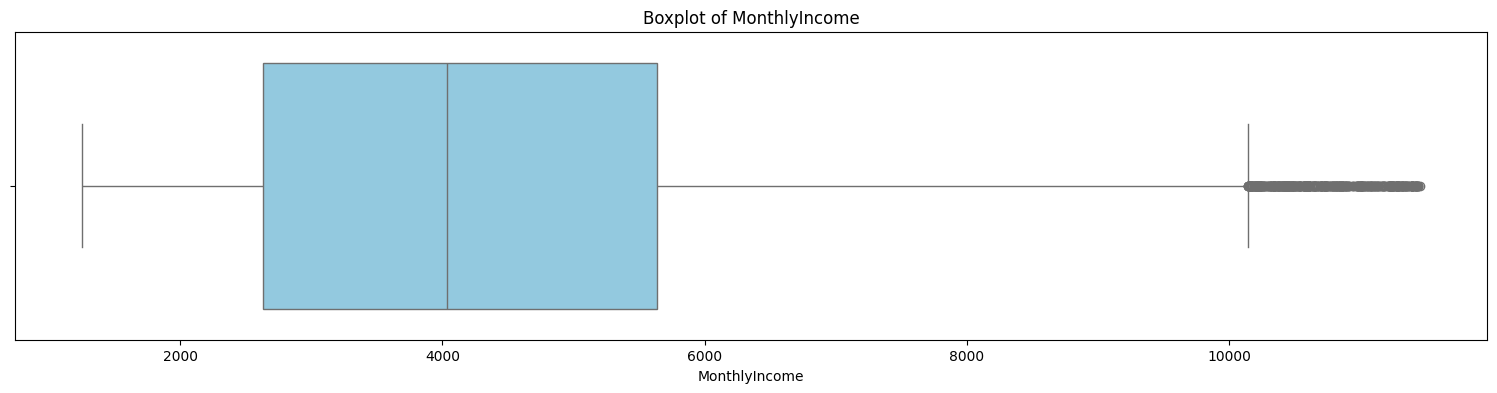

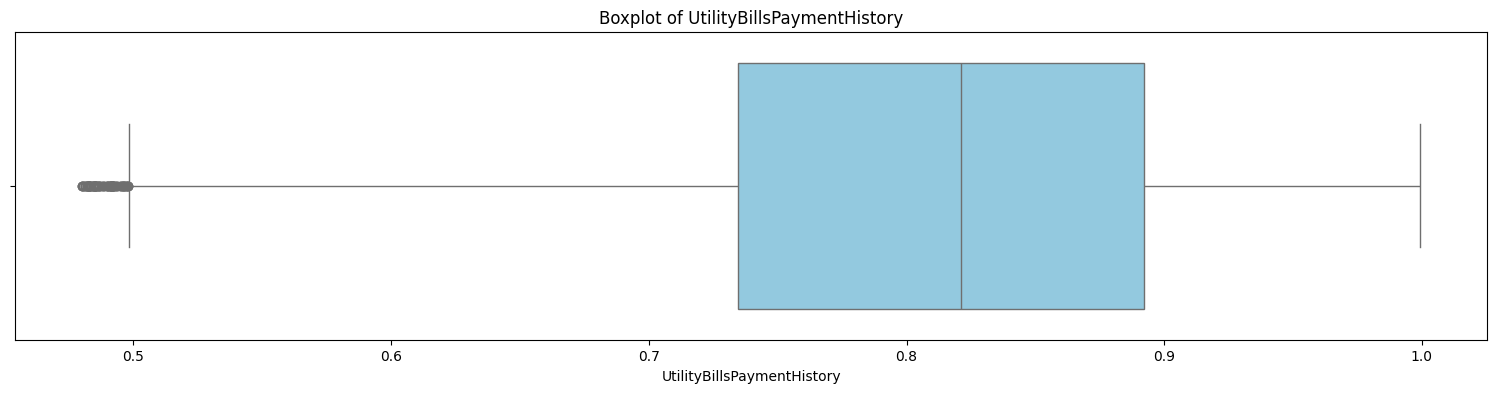

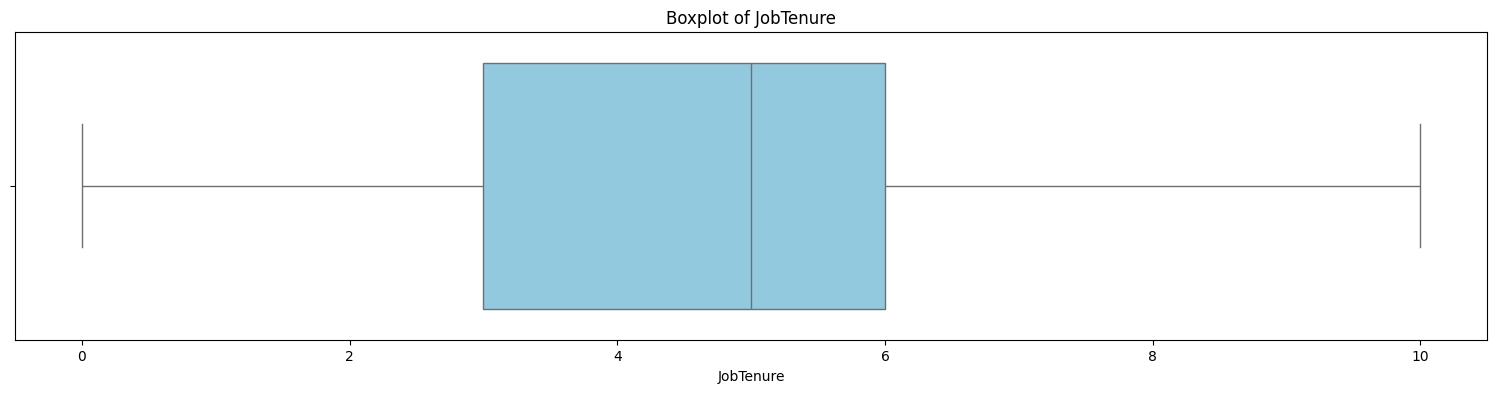

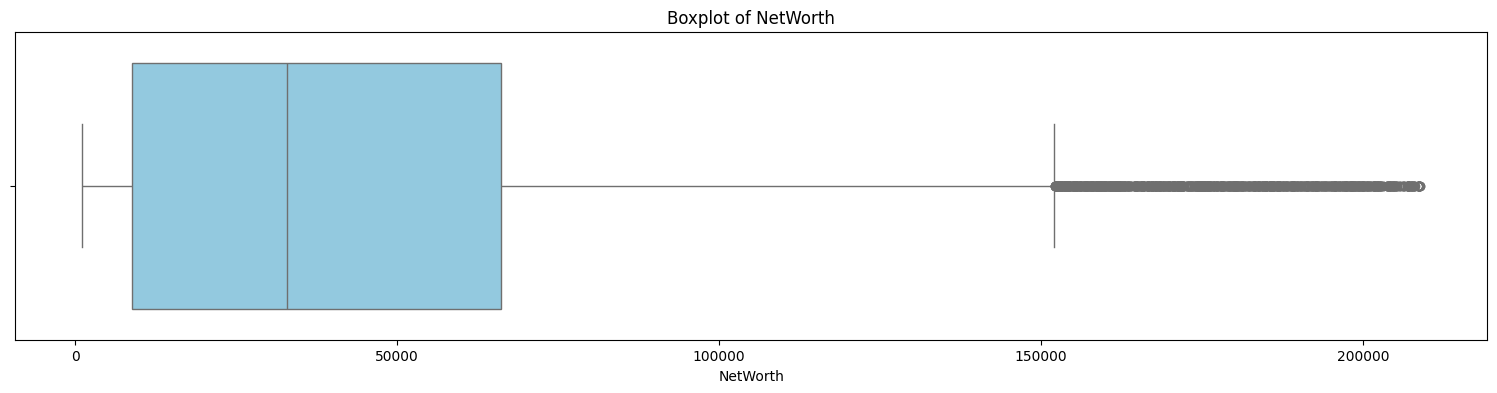

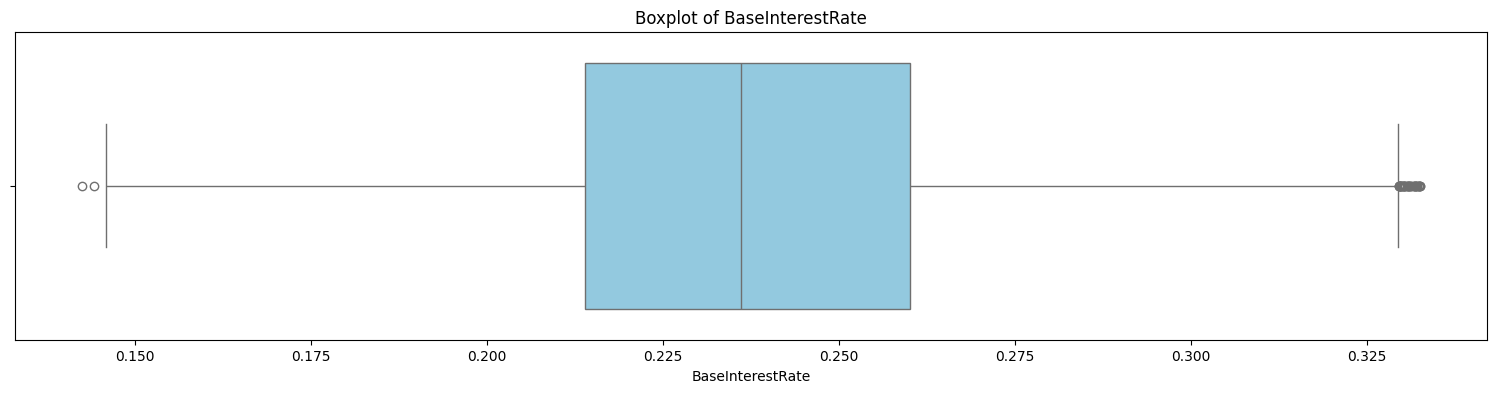

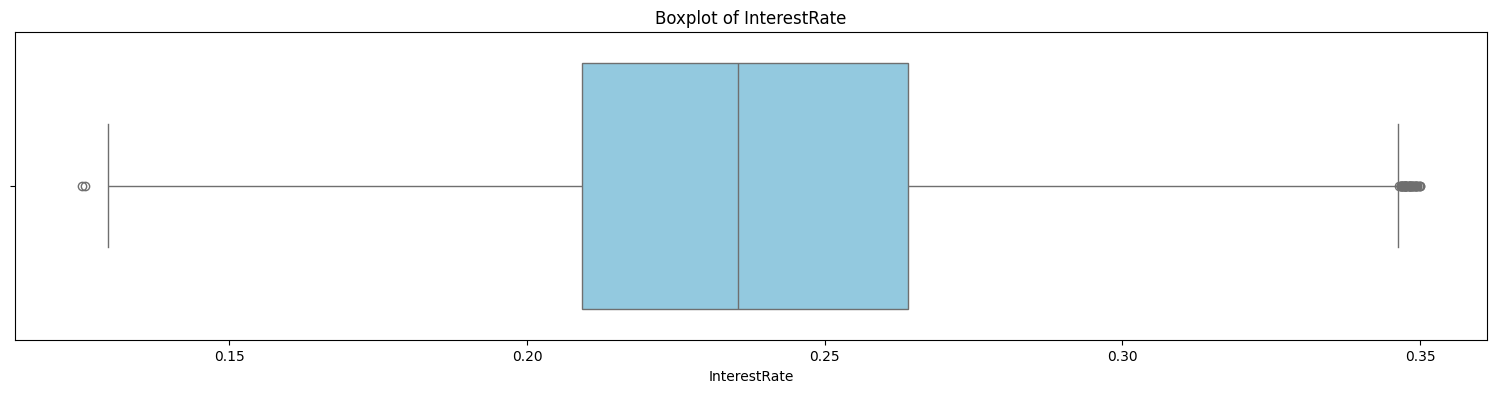

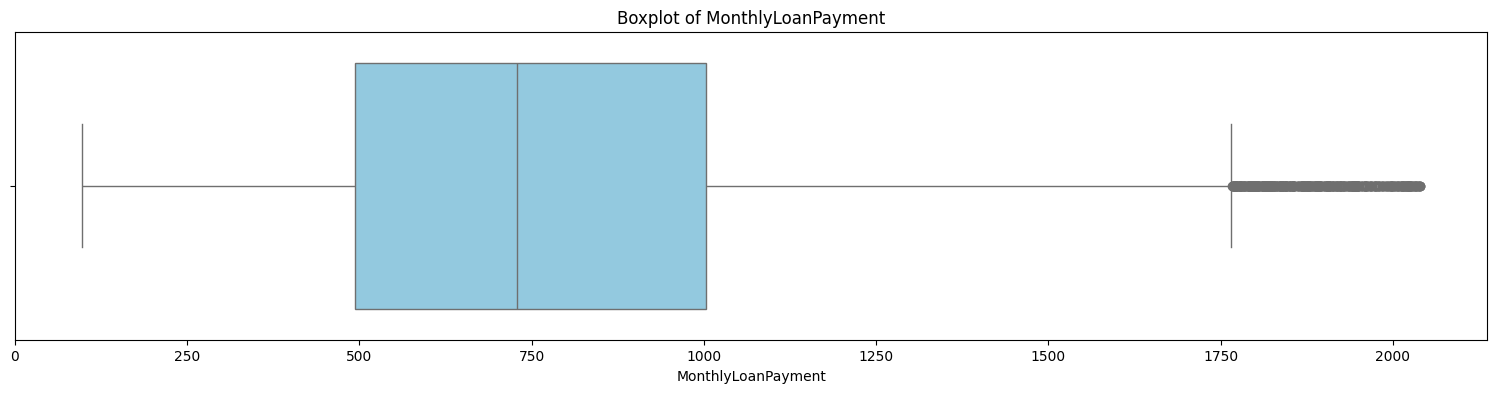

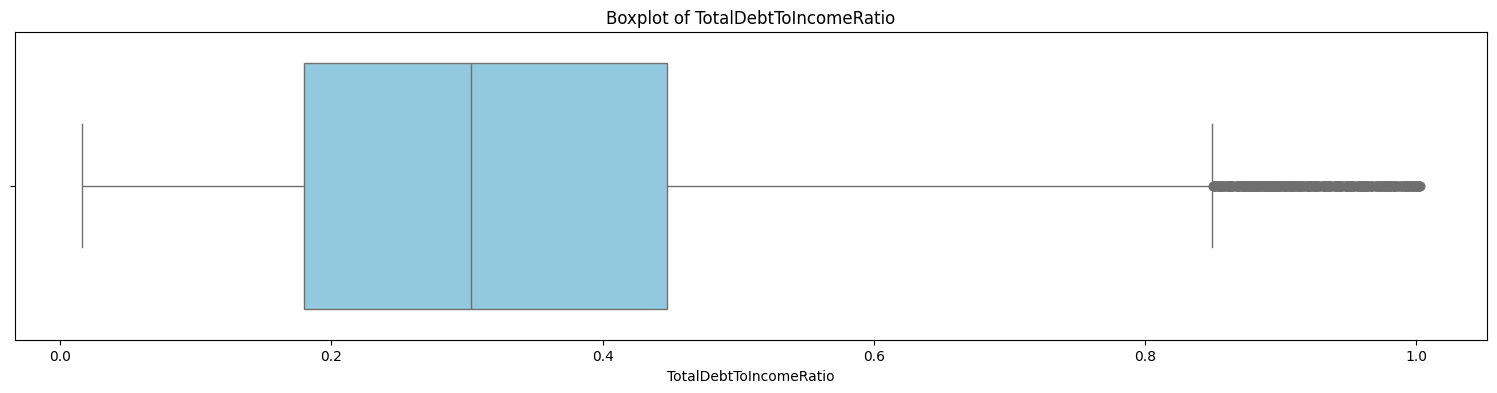

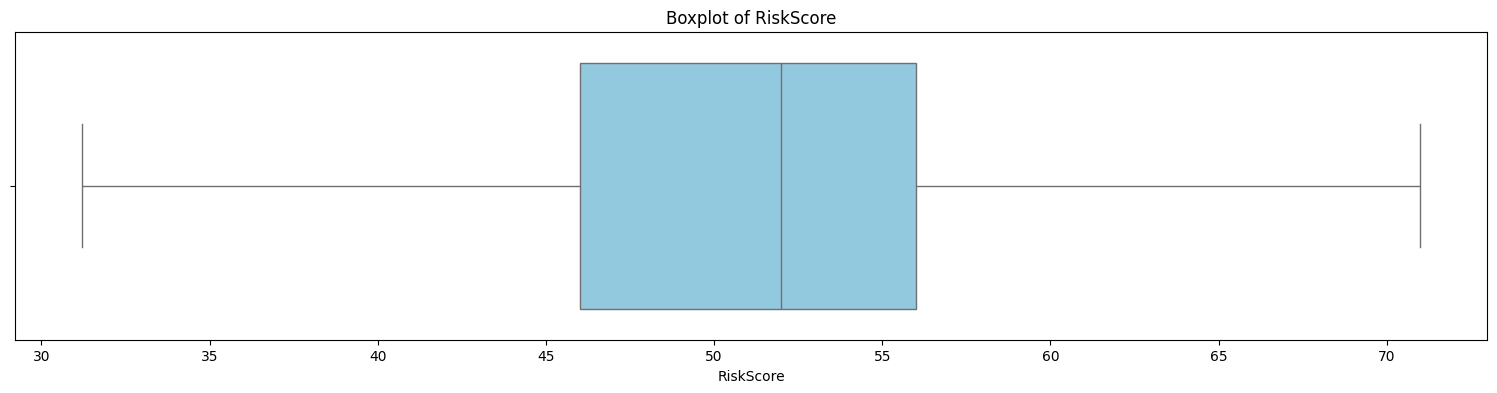

In [497]:
for feature in numerical_columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=loan[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

Data Distribution

Histogram

In [498]:
loan.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22     13152.0            48       Married  ...   
1      Associate          15     26045.0            48        Single  ...   
2       Bachelor          26     17627.0            36       Married  ...   
3    High School          34     37898.0            96        Single  ...   
4      Associate          17      9184.0            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972          5  126928.0   
1    3309.083333                   0.935132          3   43609.0   
2    3393.666667                   0.872241          6    5205.0   
3    5757.000000                   0.896155          5   99452.0   
4    8605.333333                   0.941369          5   32855.5   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [499]:

# get the  quantitative features
quantitative = [f for f in loan.columns if loan.dtypes[f] != 'object']
quantitative_data = loan[quantitative]
quantitative_data.head()

Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0   45         39948          617          22     13152.0            48   
1   38         39709          628          15     26045.0            48   
2   47         40724          570          26     17627.0            36   
3   58         69084          545          34     37898.0            96   
4   37        103264          594          17      9184.0            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                   0.354418   
1                   1                  496                   0.087827   
2                   2                  902                   0.137414   
3                   1                  755                   0.267587   
4                   1                  274                   0.320535   

   NumberOfOpenCreditLines  ...  MonthlyIncome  UtilityBillsPaymentHistory  \
0                        1  ...    3329.000000                    0.724972   
1                        5  ...    3309.083333                    0.935132   
2                        2  ...    3393.666667                    0.872241   
3                        2  ...    5757.000000                    0.896155   
4                        0  ...    8605.333333                    0.941369   

   JobTenure  NetWorth  BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0          5  126928.0          0.199652      0.227590          419.805992   
1          3   43609.0          0.207045      0.201077          794.054238   
2          6    5205.0          0.217627      0.212548          666.406688   
3          5   99452.0          0.300398      0.300911         1047.506980   
4          5   32855.5          0.197184      0.175990          330.179140   

   TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0                0.181077             0       49.0  
1                0.389852             0       52.0  
2                0.462157             0       52.0  
3                0.313098             0       54.0  
4                0.070210             1       36.0  

[5 rows x 30 columns]

In [500]:
loan.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22     13152.0            48       Married  ...   
1      Associate          15     26045.0            48        Single  ...   
2       Bachelor          26     17627.0            36       Married  ...   
3    High School          34     37898.0            96        Single  ...   
4      Associate          17      9184.0            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972          5  126928.0   
1    3309.083333                   0.935132          3   43609.0   
2    3393.666667                   0.872241          6    5205.0   
3    5757.000000                   0.896155          5   99452.0   
4    8605.333333                   0.941369          5   32855.5   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

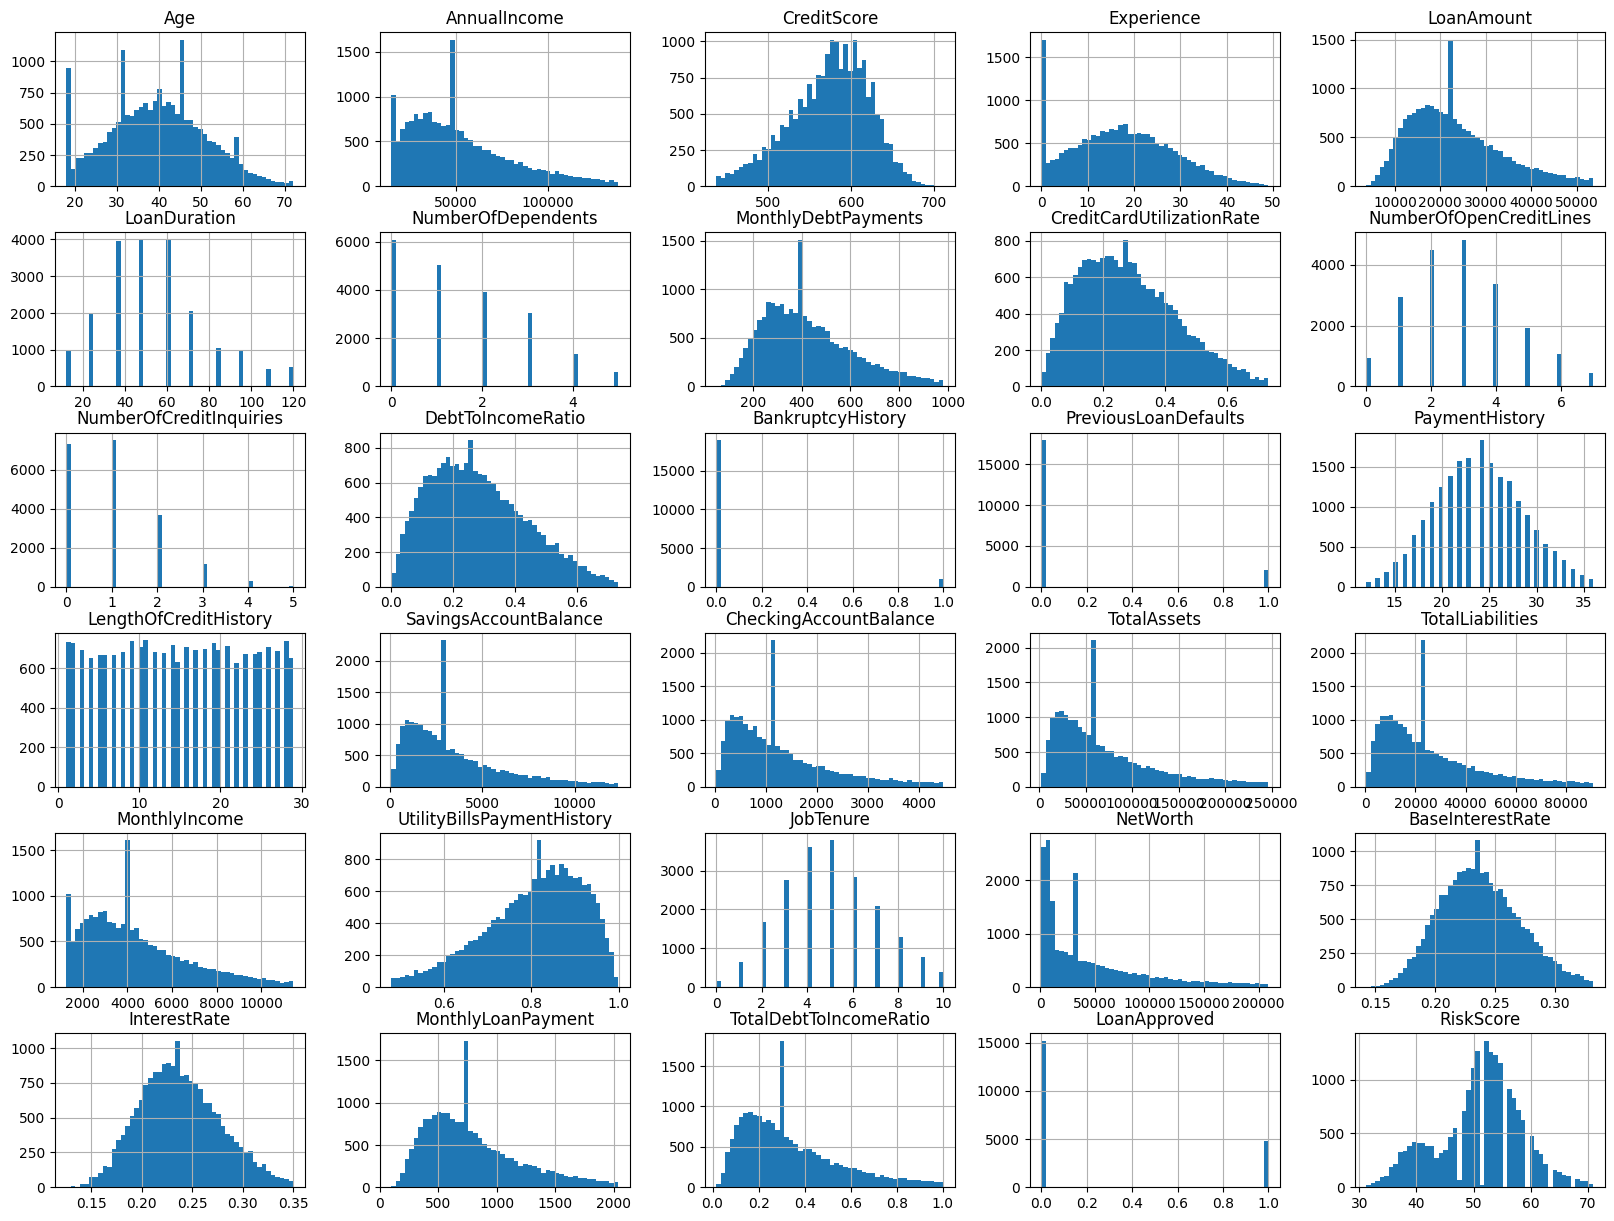

In [501]:
quantitative_data.hist(bins=50, figsize=(20,15))
plt.show()

Scatter Plot

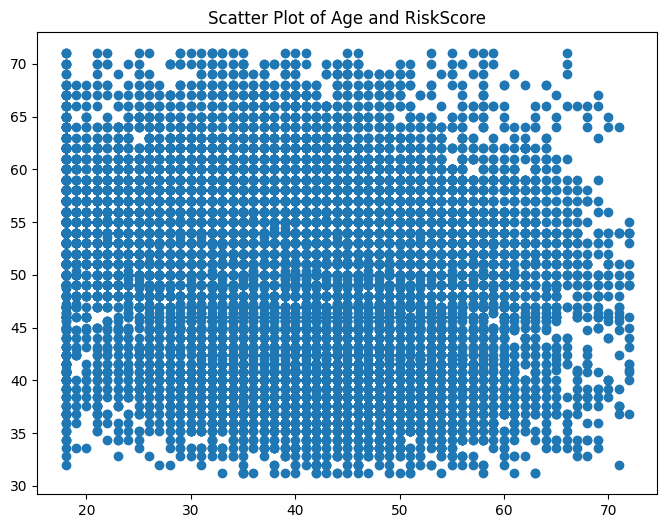

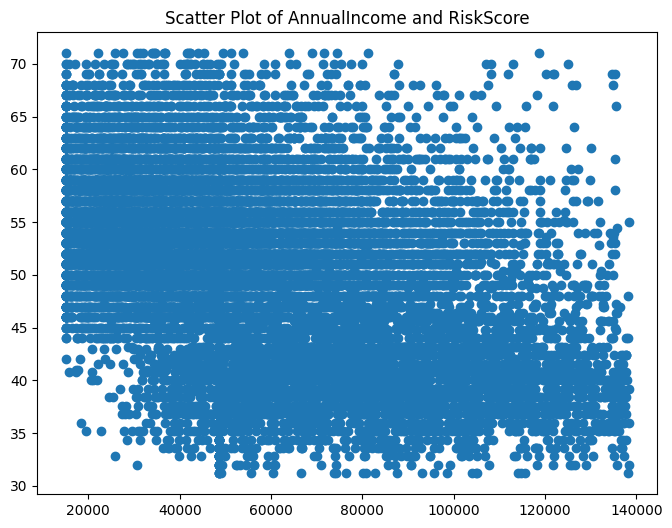

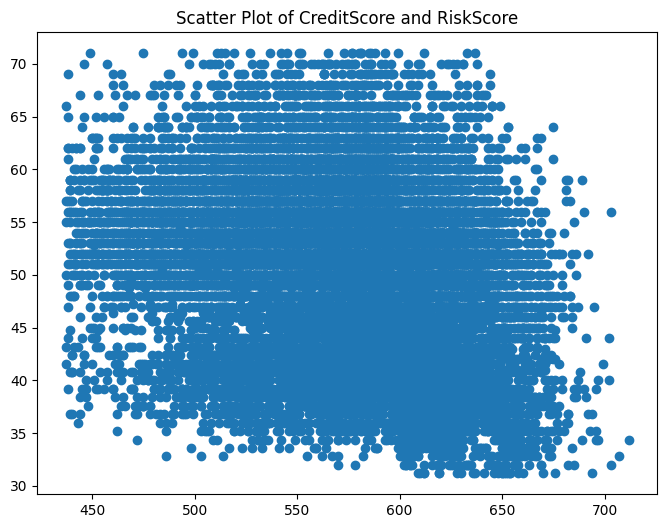

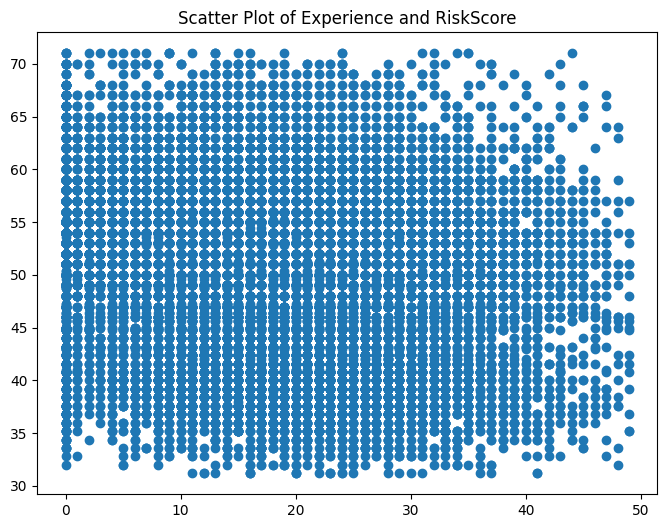

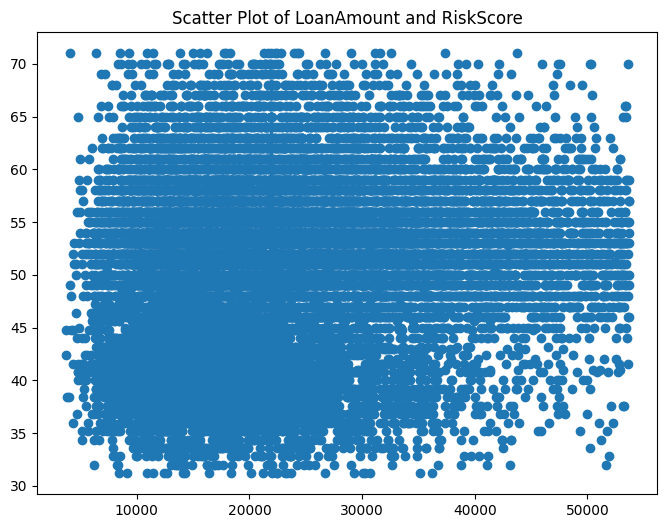

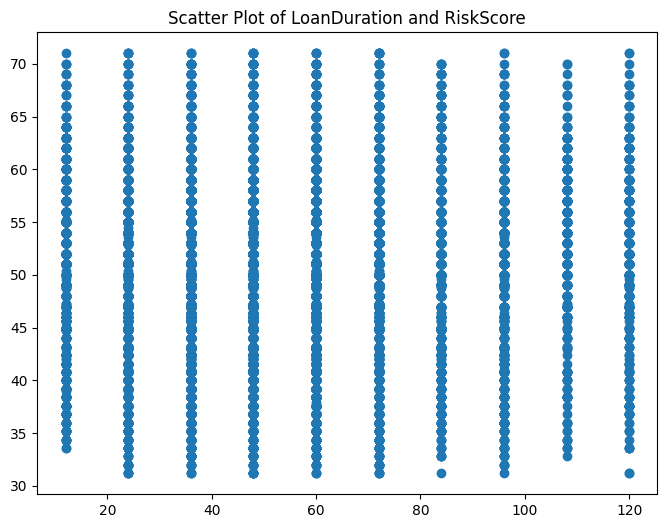

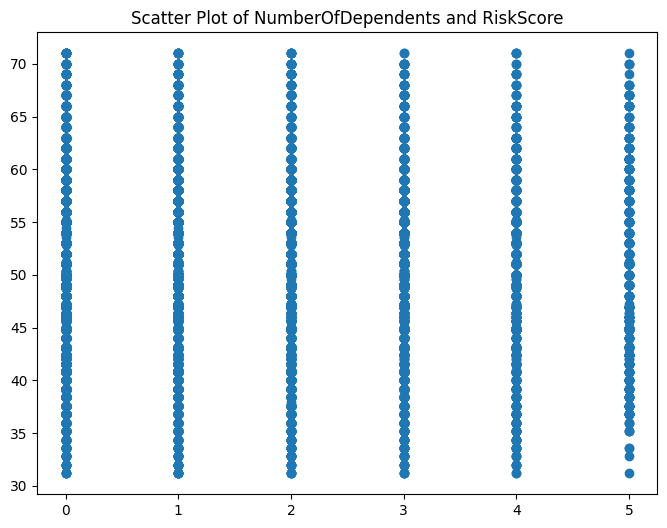

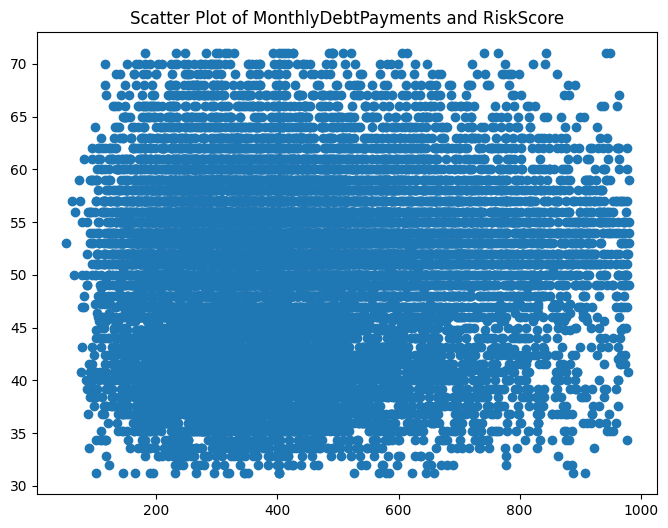

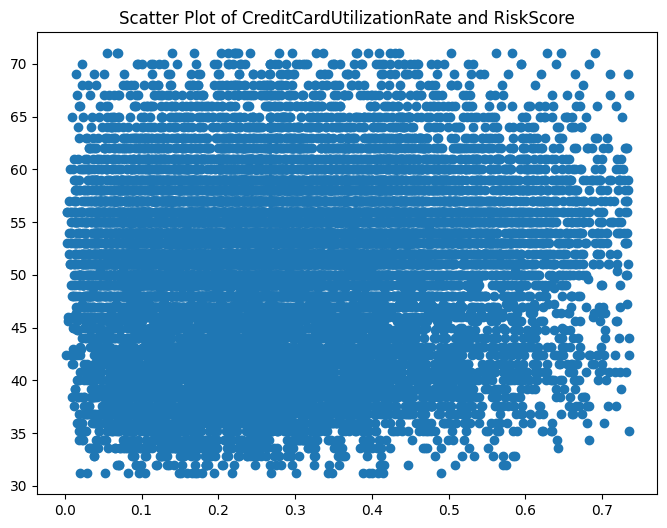

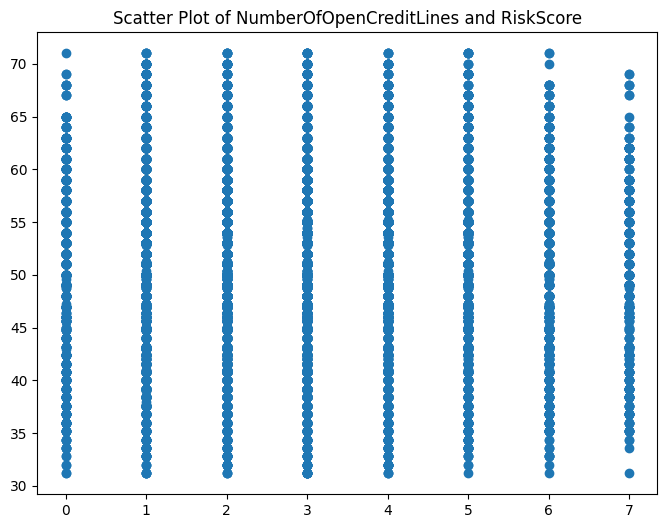

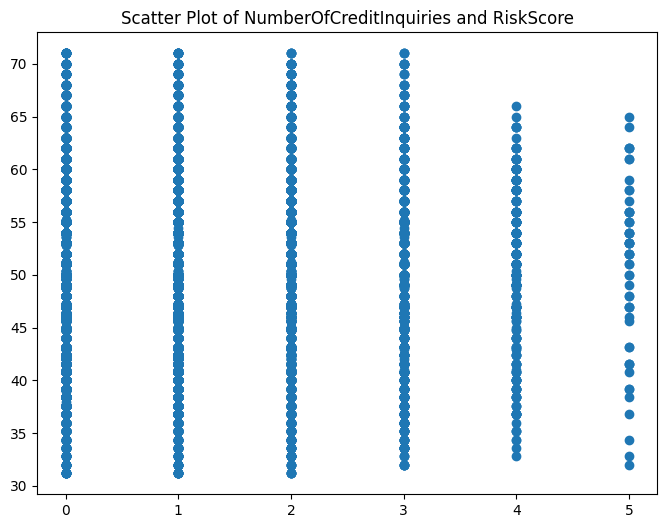

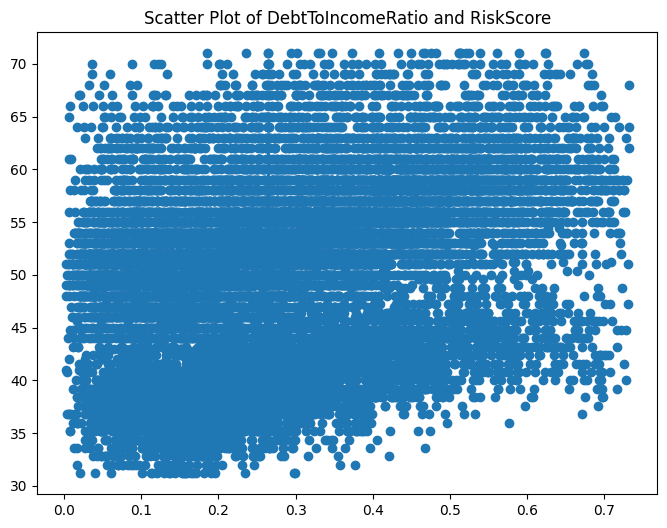

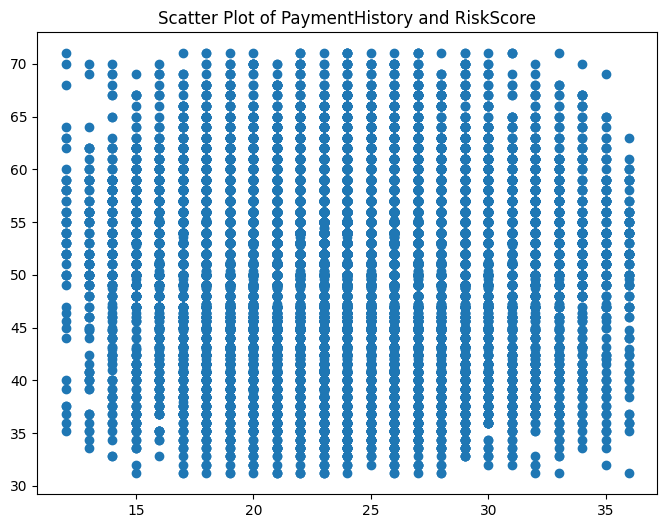

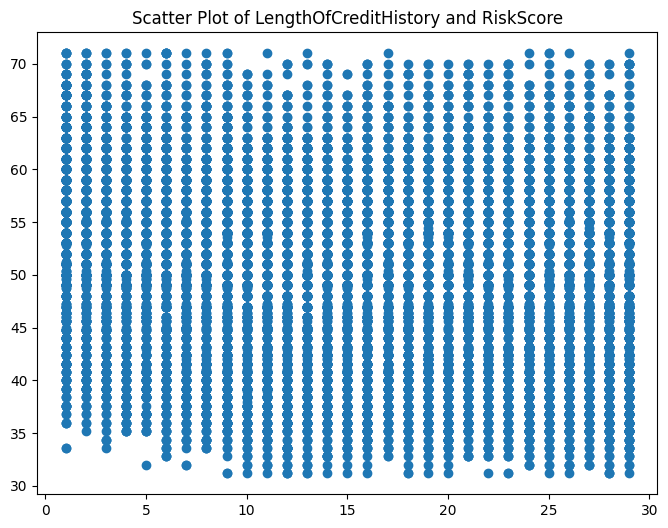

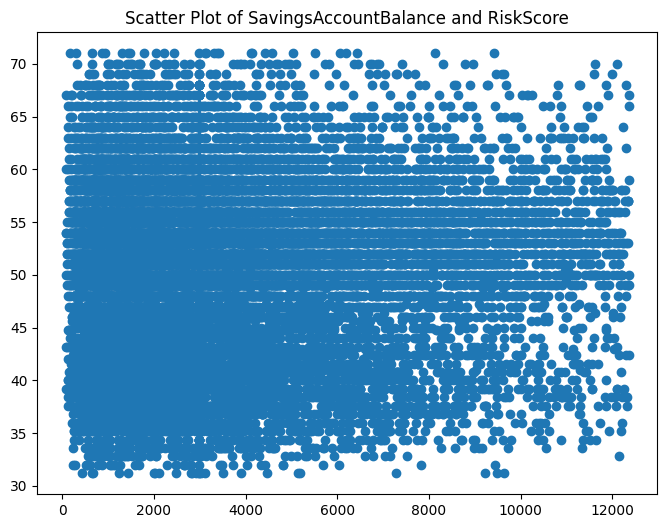

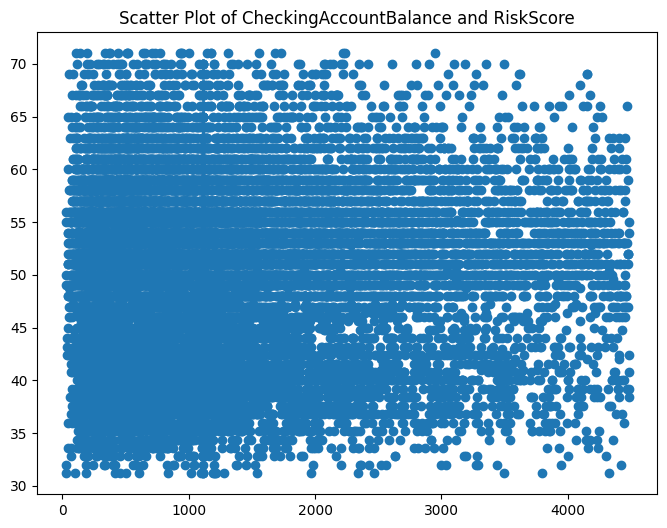

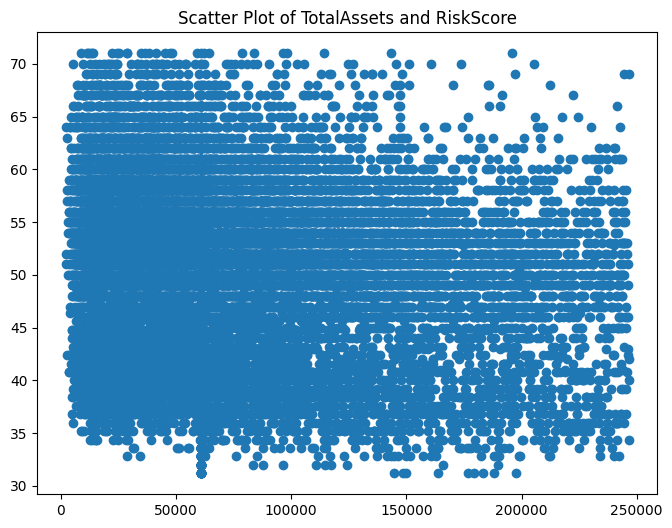

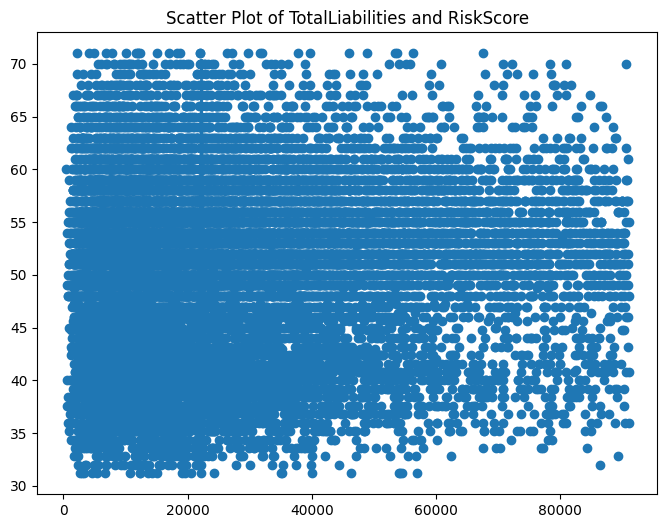

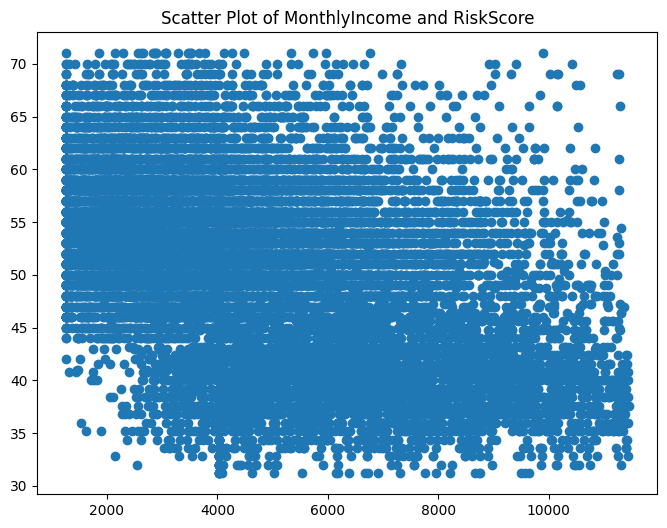

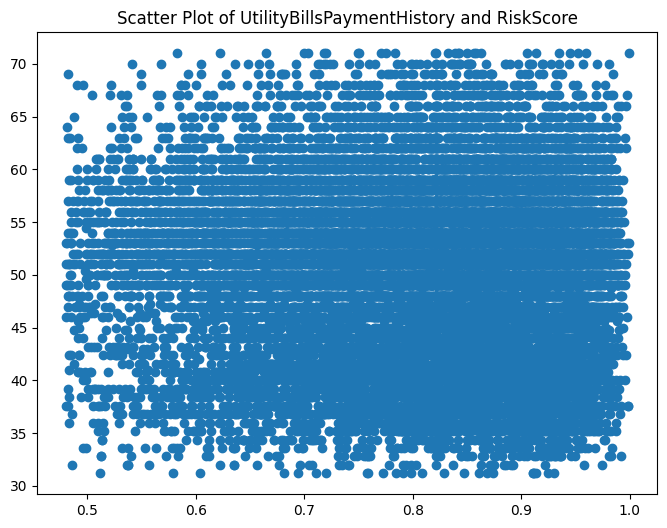

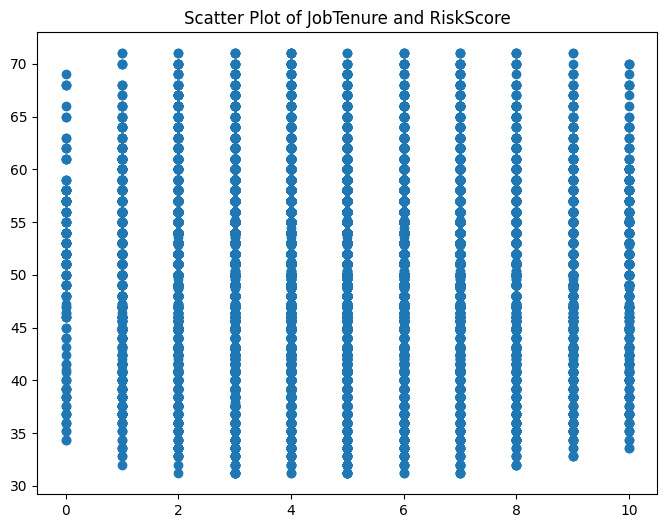

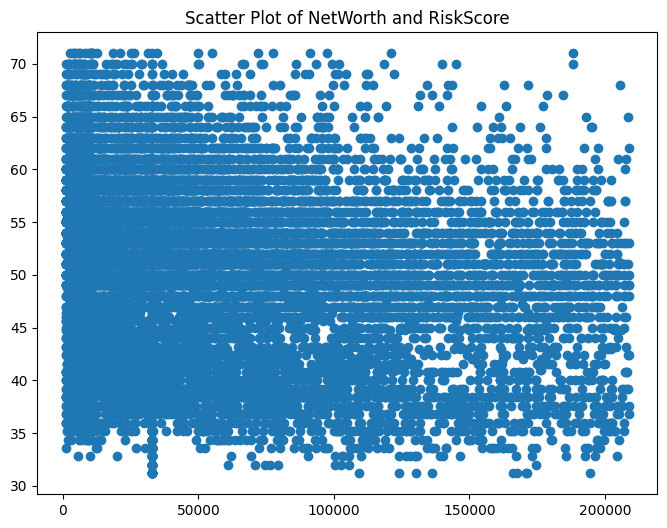

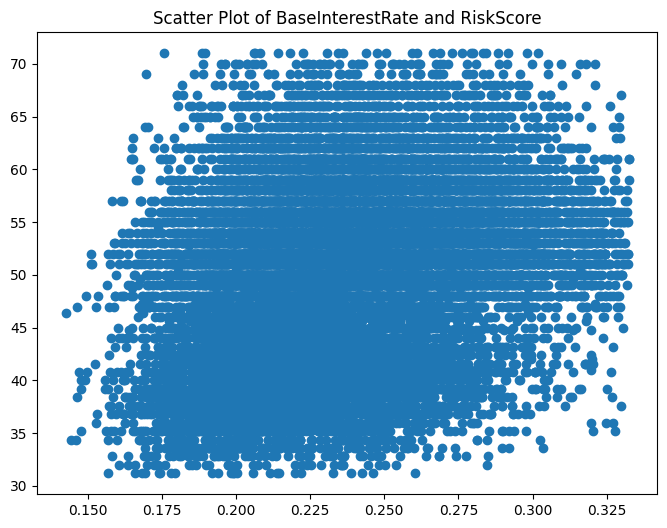

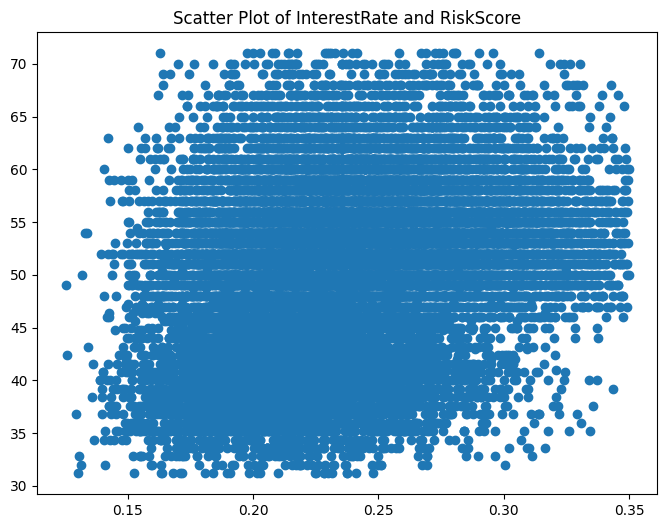

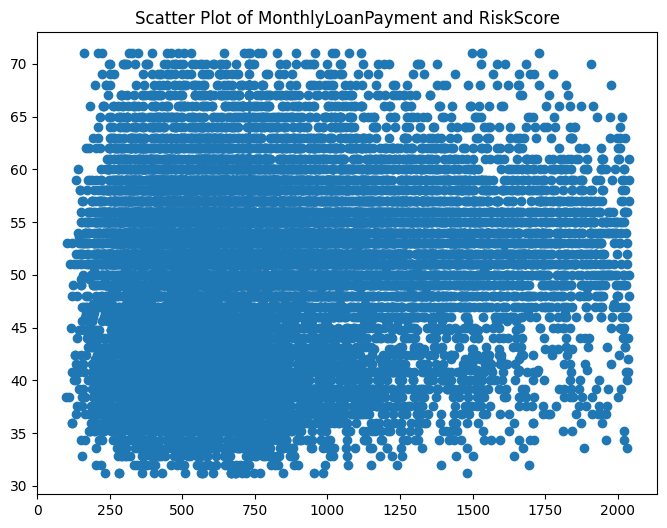

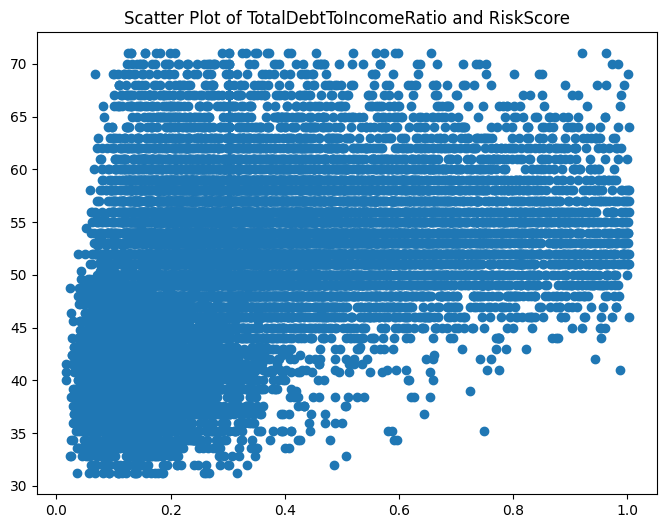

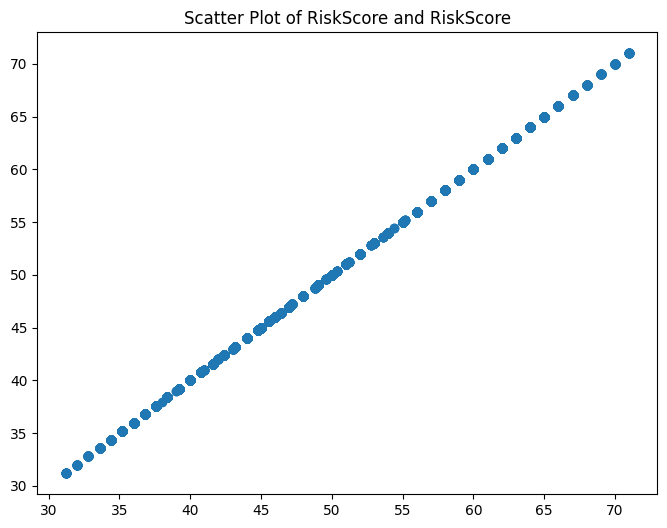

In [502]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(loan[col], loan['RiskScore'])
    plt.title(f'Scatter Plot of {col} and RiskScore')
    plt.show()

correlations between features

In [503]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  float64
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [504]:
object_cols = loan.select_dtypes(include=['object']).columns
object_cols

Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [505]:
new_loan = loan.drop(columns=object_cols)
correlation_matrix = new_loan.corr()
correlation_matrix

Age  AnnualIncome  CreditScore  Experience  \
Age                         1.000000      0.127570     0.307369    0.977140   
AnnualIncome                0.127570      1.000000     0.099906    0.129543   
CreditScore                 0.307369      0.099906     1.000000    0.312418   
Experience                  0.977140      0.129543     0.312418    1.000000   
LoanAmount                 -0.001422     -0.009892    -0.011495    0.000152   
LoanDuration               -0.005639     -0.003821    -0.001255   -0.006119   
NumberOfDependents         -0.003175     -0.000947    -0.017213   -0.002457   
MonthlyDebtPayments         0.003186      0.006880    -0.000396    0.004231   
CreditCardUtilizationRate  -0.001870     -0.006104    -0.006526   -0.001685   
NumberOfOpenCreditLines    -0.001260     -0.012515    -0.002797   -0.001656   
NumberOfCreditInquiries    -0.000178      0.000778     0.002164   -0.000686   
DebtToIncomeRatio           0.007292      0.008045     0.005607    0.005725   
BankruptcyHistory           0.007790      0.009947     0.012623    0.007592   
PreviousLoanDefaults       -0.004762     -0.008471    -0.009992   -0.004054   
PaymentHistory             -0.004492     -0.003732     0.000665   -0.004954   
LengthOfCreditHistory      -0.001134      0.001465     0.007783   -0.001788   
SavingsAccountBalance      -0.000447     -0.002560     0.001456    0.000415   
CheckingAccountBalance      0.006867      0.005040     0.000764    0.005100   
TotalAssets                -0.002280      0.012632     0.001190   -0.002786   
TotalLiabilities           -0.009766     -0.012826    -0.004668   -0.009000   
MonthlyIncome               0.128874      0.985844     0.099833    0.130577   
UtilityBillsPaymentHistory -0.006864     -0.008660    -0.008748   -0.006488   
JobTenure                   0.001552      0.000334     0.005689    0.002589   
NetWorth                   -0.002123      0.012279     0.004351   -0.002172   
BaseInterestRate           -0.225268     -0.077246    -0.670726   -0.228693   
InterestRate               -0.190743     -0.063970    -0.548695   -0.193865   
MonthlyLoanPayment         -0.020477     -0.014821    -0.071062   -0.020814   
TotalDebtToIncomeRatio     -0.112649     -0.578988    -0.107462   -0.114162   
LoanApproved                0.140097      0.491381     0.139097    0.141087   
RiskScore                  -0.162671     -0.417949    -0.235482   -0.165034   

                            LoanAmount  LoanDuration  NumberOfDependents  \
Age                          -0.001422     -0.005639           -0.003175   
AnnualIncome                 -0.009892     -0.003821           -0.000947   
CreditScore                  -0.011495     -0.001255           -0.017213   
Experience                    0.000152     -0.006119           -0.002457   
LoanAmount                    1.000000      0.005384           -0.008250   
LoanDuration                  0.005384      1.000000           -0.001301   
NumberOfDependents           -0.008250     -0.001301            1.000000   
MonthlyDebtPayments           0.009562      0.000103            0.000585   
CreditCardUtilizationRate     0.003397     -0.004640            0.007100   
NumberOfOpenCreditLines       0.000730      0.002206            0.007407   
NumberOfCreditInquiries      -0.005592     -0.000310           -0.003313   
DebtToIncomeRatio            -0.009848     -0.000506           -0.006321   
BankruptcyHistory             0.005605     -0.000434           -0.001154   
PreviousLoanDefaults         -0.005426      0.015646            0.006116   
PaymentHistory                0.000849      0.004074            0.004139   
LengthOfCreditHistory         0.005531      0.013693            0.002705   
SavingsAccountBalance        -0.007370     -0.005156            0.005557   
CheckingAccountBalance        0.011107     -0.011161           -0.002405   
TotalAssets                   0.009543     -0.000957            0.000107   
TotalLiabilities              0.001658      0.002155           

In [506]:
new_loan.BankruptcyHistory.unique()

array([0, 1])

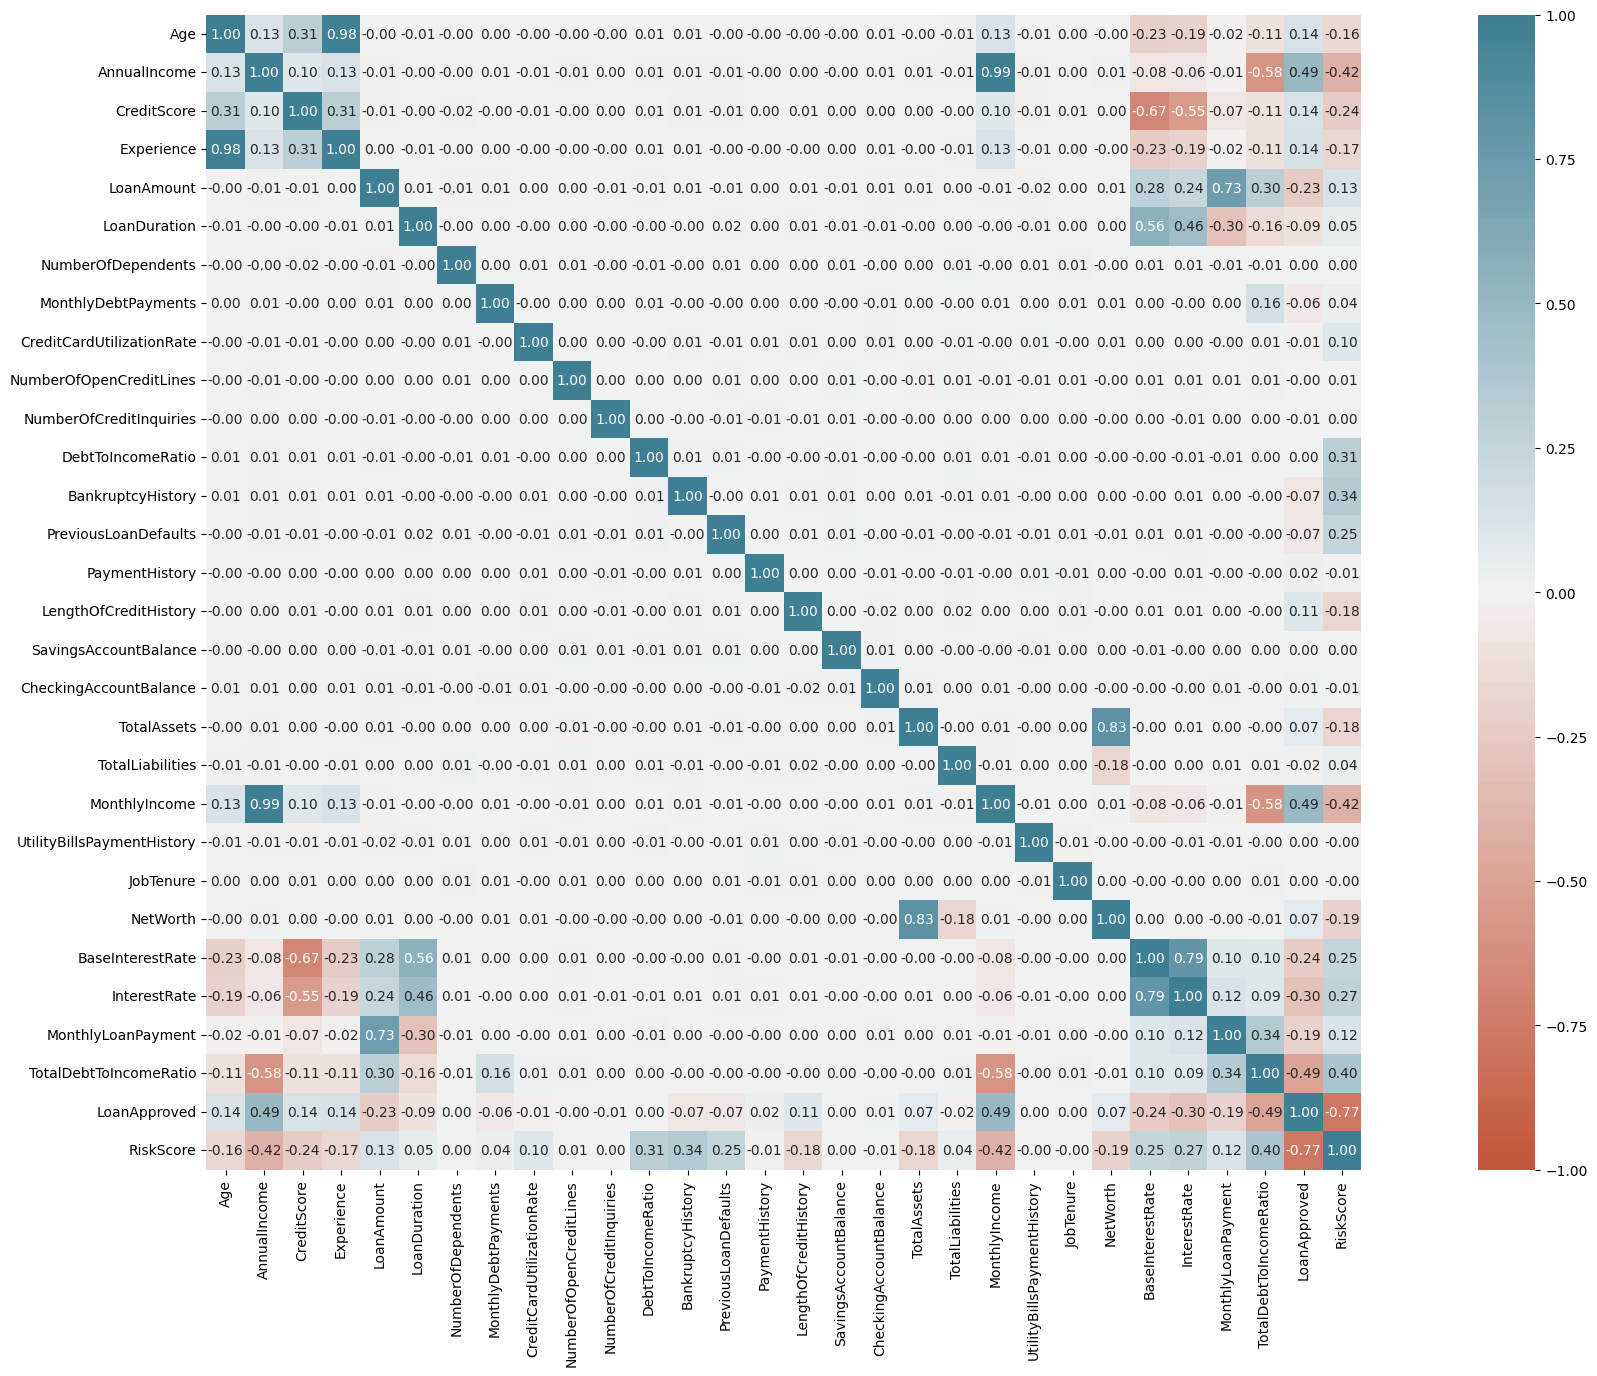

In [507]:
correlation_matrix = new_loan.corr()
#Visualize correlation
plt.subplots(figsize=(30,15))
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt=".2f",
    annot=True
)

Feature Engineering

In [508]:
categorical_columns = loan.select_dtypes(include='object').columns
categorical_columns

Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [509]:
categorical_columns = [
     'EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'
]

In [510]:
# # Convert 'ApplicationDate' to datetime and handle future dates
# loan['ApplicationDate'] = pd.to_datetime(loan['ApplicationDate'], errors='coerce')
# loan.loc[loan['ApplicationDate'] > pd.Timestamp.now(), 'ApplicationDate'] = pd.NaT
# median_date = loan['ApplicationDate'].median()
# loan['ApplicationDate'].fillna(median_date, inplace=True)

# # Extract month and year from 'ApplicationDate'
# loan['ApplicationMonth'] = loan['ApplicationDate'].dt.month
# loan['ApplicationYear'] = loan['ApplicationDate'].dt.year

# # Drop 'ApplicationDate' as it's no longer needed
# loan.drop(columns=['ApplicationDate'], inplace=True)

In [511]:
data_encoded = pd.get_dummies(loan, columns=categorical_columns, drop_first=True)

In [512]:
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [528]:
X = data_encoded.drop(columns=['RiskScore','ApplicationDate'])
y = data_encoded['RiskScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [529]:
# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Ridge Regression
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [530]:
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
#showing the MSE, RMSE, MAE and R² Score in metrics
evaluation_metrics = {
    "Model": ["Linear Regression", "Ridge Regression"],
    "MSE": [
        mean_squared_error(y_test, linear_predictions),
        mean_squared_error(y_test, ridge_predictions),
    ],
    "RMSE": [
        mean_squared_error(y_test, linear_predictions, squared=False),
        mean_squared_error(y_test, ridge_predictions, squared=False),
    ],
    "MAE": [
        mean_absolute_error(y_test, linear_predictions),
        mean_absolute_error(y_test, ridge_predictions),
    ],
    "R² Score": [
        r2_score(y_test, linear_predictions),
        r2_score(y_test, ridge_predictions),
    ],
}

metrics_df = pd.DataFrame(evaluation_metrics)

print(metrics_df)


               Model       MSE      RMSE       MAE  R² Score
0  Linear Regression  0.108747  0.329769  0.229802  0.893776
1   Ridge Regression  0.108797  0.329844  0.230172  0.893727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
